# **Experimental**

## Upload Data

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
!pip install SALib
from scipy.stats import norm
from scipy.stats import qmc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import approx_fprime
from scipy.stats import t
!pip install emcee corner
from sklearn.metrics import r2_score
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from itertools import combinations
from numpy.linalg import eigvalsh, LinAlgError
from sklearn.preprocessing import normalize
import emcee
import corner
from SALib.sample import morris as morris_sample
from SALib.analyze import morris as morris_analyze
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import xgboost
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
!pip install openpyxl
from __future__ import division
from scipy.integrate import odeint
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.9 MB/s eta 0:00:00


**GALG20**

Estimation

In [2]:
#Data from In situ NIR spectroscopy monitoring of plasmid production processes: effect of producing strain, medium composition and the cultivation strategy
  #Marta B. Lopes, Geisa A. L. Gonçalves (2014)
  #MG1655, 20 g/L Glucose, Batch reactor (1.8L)

Lopes_data = pd.read_excel('/content/drive/MyDrive/Data_Org.xlsx', sheet_name='GB20Ub')
Lopes_data = pd.DataFrame(Lopes_data)
Lopes_data = Lopes_data[['t', 'P (g/L)', 'X (g/L)', 'S (g/L)', 'A (g/L)']].values
t_L = Lopes_data[:, 0]
P_L = Lopes_data[:, 1]
X_L = Lopes_data[:, 2]
S_L = Lopes_data[:, 3]
A_L = Lopes_data[:, 4]
t_d, P_d, X_d, S_d, A_d = t_L, P_L, X_L, S_L, A_L

Batch Testing

In [3]:
#Data from Plasmid DNA production with Escherichia coli GALG20, a pgi-gene knockout strain: Fermentation strategies and impact on downstream processing
  #Geisa A. L. Gonçalves, Kristala L.J. Prather (2014)
  #MG1655, 20 g/L Glucose, Batch reactor (1.0L)

Geisa_data = pd.read_excel('/content/drive/MyDrive/Data_Org.xlsx', sheet_name='GB20Ua')
Geisa_data = pd.DataFrame(Geisa_data)
Geisa_data = Geisa_data[['t', 'P (g/L)', 'X (g/L)', 'S (g/L)', 'A (g/L)']].values
t_G = Geisa_data[:, 0]
P_G = Geisa_data[:, 1]
X_G = Geisa_data[:, 2]
S_G = Geisa_data[:, 3]
A_G = Geisa_data[:, 4]
t_t, P_t, X_t, S_t, A_t = t_G, P_G, X_G, S_G, A_G

Shake Flask Testing

In [4]:
#Data from IST
  #This Work
  #GAL20, 20 g/L Glucose, Shake Flask

#WHOLE DATA
IST_s_data = pd.read_excel('/content/drive/MyDrive/Data_Org.xlsx', sheet_name='GSF20Ua')
IST_s_data = pd.DataFrame(IST_s_data)
IST_s_data.replace("", np.nan, inplace=True)
IST_s_data = IST_s_data[['t', 'P (g/L)', 'X (g/L)', 'S (g/L)', 'A (g/L)']].values
t_I = IST_s_data[:, 0]
P_I = IST_s_data[:, 1]
X_I = IST_s_data[:, 2]
S_I = IST_s_data[:, 3]
A_I = IST_s_data[:, 4]
t_t2a, P_t2a, X_t2a, S_t2a, A_t2a = t_I, P_I, X_I, S_I, A_I

IST_s_data = pd.read_excel('/content/drive/MyDrive/Data_Org.xlsx', sheet_name='GSF20Ua')
IST_s_data.replace("", np.nan, inplace=True)
P_ISD = IST_s_data['SD P'].values
X_ISD = IST_s_data['SD X'].values
S_ISD = IST_s_data['SD S'].values
A_ISD = IST_s_data['SD A'].values
P_SD, X_SD, S_SD, A_SD = P_ISD, X_ISD, S_ISD, A_ISD

#ONLY FULL DATA POINTS
IST_s_data = pd.read_excel('/content/drive/MyDrive/Data_Org.xlsx', sheet_name='GSF20Ua')
IST_s_data.replace("", np.nan, inplace=True)
filtered_data = IST_s_data.dropna(subset=['P (g/L)', 'X (g/L)', 'S (g/L)', 'A (g/L)'])
t_I_clean = filtered_data['t'].values
P_I_clean = filtered_data['P (g/L)'].values
X_I_clean = filtered_data['X (g/L)'].values
S_I_clean = filtered_data['S (g/L)'].values
A_I_clean = filtered_data['A (g/L)'].values
t_t2, P_t2, X_t2, S_t2, A_t2 = t_I_clean, P_I_clean, X_I_clean, S_I_clean, A_I_clean

## Visualise data

In [5]:
print(t_d, P_d, X_d, S_d, A_d)

[ 0.          0.25        0.5         0.75        1.          1.25
  1.5         1.75        2.          2.25        2.5         2.75
  3.          3.25        3.5         3.75        4.          4.25
  4.5         4.75        5.          5.25        5.5         5.75
  6.          6.25        6.5         6.75        7.          7.25
  7.5         7.75        8.          8.25        8.5         8.75
  9.          9.25        9.5         9.75       10.         10.25
 10.5        10.75       11.         11.25       11.5        11.75
 12.         12.25       12.75       13.25       13.75       14.25
 14.75       15.25       19.13333333 20.05       22.91666667 24.05      ] [0.00611716 0.00620991 0.00623596 0.00645221 0.00632142 0.00643189
 0.00654079 0.00678414 0.0069686  0.0067831  0.00710773 0.00770489
 0.0075741  0.0079993  0.00855737 0.00978608 0.01037073 0.01116277
 0.01202256 0.01205017 0.0149974  0.01702545 0.01782635 0.02390943
 0.02671493 0.02785088 0.03586144 0.04069238 0.04850232

In [6]:
print(t_t, P_t, X_t, S_t, A_t)

[ 0.  2.  4.  8. 12. 14. 16. 24.] [0.001      0.00639016 0.01178032 0.02584365 0.04891895 0.0590695
 0.07137    0.08731932] [0.12 0.64 1.92 4.   5.6  7.2  8.   8.26] [20.        19.5       19.0077525  4.9702455  0.         0.
  0.         0.       ] [0.       0.       0.049844 0.101319 0.083206 0.092818 0.       0.      ]


In [7]:
print(t_t2, P_t2, X_t2, S_t2, A_t2)

[ 0  9 24] [0.001   0.00568 0.01262] [0.094 1.502 2.106] [16.17  11.3    4.885] [0.    0.81  7.795]


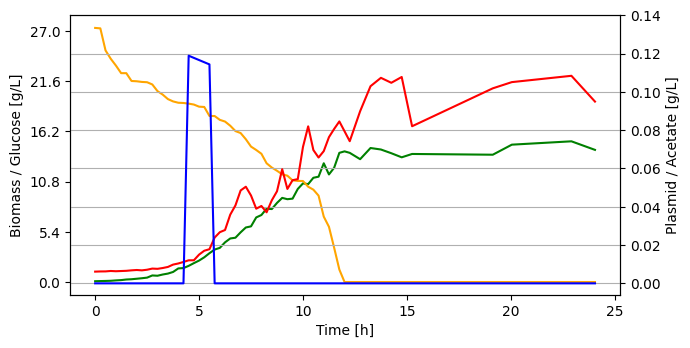

In [8]:
#PLOT EXPERIMENTAL DARA
fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.plot(t_d, X_d, label='Biomass [g/L]', color='green')
ax1.plot(t_d, S_d, label='Glucose [g/L]', color='orange')
ax1.set_xlabel('Time [h]')
ax1.set_ylabel('Biomass / Glucose [g/L]')
ax1.tick_params(axis='y')
ax1.set_yticks(np.arange(0, max(S_d)*1.1, np.round(max(S_d),0)/5))

ax2 = ax1.twinx()
ax2.plot(t_d, P_d, label='Plasmid [g/L]', color='r')
ax2.plot(t_d, A_d, label='Acetate [g/L]', color='blue')
ax2.set_ylabel('Plasmid / Acetate [g/L]')
ax2.tick_params(axis='y')
ax2.set_yticks(np.arange(0, max(A_d)*1.2, np.round(max(A_d),1)/5))

lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]

#fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=5, shadow=True, prop={'size': 10})

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.grid(True)
plt.show()

In [9]:
# CALCULATE MAX VALUES AND RATIOS
Biomass_Max_d = round(max(X_d), 6)
Plasmid_Max_d = round(max(P_d), 10)
Acetate_Max_d = round(max(A_d), 10)
Glucose_Min_d = round(min(S_d), 10)

Bio_Plas_ratio_d = Plasmid_Max_d/Biomass_Max_d
Bio_Ace_ratio_d = Acetate_Max_d/Biomass_Max_d
print("Biomass Max (g):", Biomass_Max_d)
print("Plasmid Max (g)):", Plasmid_Max_d)

print("Acetate Max (g):", Acetate_Max_d)
print()
print("Plas/Bio Ratio (g):", Bio_Plas_ratio_d)
print("Ace/Bio Ratio (g):", Bio_Ace_ratio_d)

Biomass Max (g): 15.12
Plasmid Max (g)): 0.108367316
Acetate Max (g): 0.11886

Plas/Bio Ratio (g): 0.00716715052910053
Ace/Bio Ratio (g): 0.00786111111111111


# **Model Formulation**

In [10]:
#DISCRETIZATION OF TIME
dt = 0.02
t0 = 0
T = t_d[-1] #h
t = np.linspace(t0, T, int(T/dt)+1) #t0= Start time; T= End time; int(T/dt)+1 = Numbr of intervals (Total time (T) divided by step (dt) plus 1)

#INITIAL CONDITIONS
X0 = X_d[0]
S0 = S_d[0]
P0 = P_d[0]
A0 = A_d[0]

y0_d = [X0, S0, P0, A0]
print(y0_d)

[np.float64(0.0852), np.float64(27.30434668), np.float64(0.006117156), np.float64(0.0)]


In [11]:
#MODEL STRUCTURE
def kinetic_model(y, t, params):
    X = y[0]
    S = y[1]
    P = y[2]
    A = y[3]
    umaxS, umaxA, Yx_s, Yx_a, Yp_xs, Yp_xa, Ypa_s, Ks, Ka, Kix_a  = params

    uS = (umaxS * S / (Ks + S))*(Kix_a/(Kix_a+(A)))
    uA = (umaxA * A / (Ka + A))*(Kix_a/(Kix_a+(A)))
    uT = uS + uA

    dXdt = (uT) * X                                     #BIOMASS RATE
    dSdt = -((uS) * X / Yx_s )                          #GLUCOSE RATE
    dAdt = (Ypa_s * (uS)) * X - (uA / Yx_a) * X         #ACETATE RATE
    dPdt = (Yp_xs * (uS) + Yp_xa * (uA)) * X            #PLASMID RATE

    return [dXdt, dSdt, dPdt, dAdt]

In [12]:
#SELECT PARAMS SET
Param_chosen = [0.38, 0.14, 0.8, 0.6, 0.0022, 0.0017, 1.2,  0.11, 0.24, 39.60] #ARTICLE LOPES ET AL (CULTURE C)

params = Param_chosen
initial_guess = Param_chosen
print(params)

y_model = odeint(kinetic_model, y0_d, t, args=(params,))

model_results_df = pd.DataFrame({
    'Time (h)': t,
    'Biomass (g/L)': y_model[:, 0],
    'Glucose (g/L)': y_model[:, 1],
    'Plasmid (g/L)': y_model[:, 2],
    'Acetate (g/L)': y_model[:, 3]
})

[0.38, 0.14, 0.8, 0.6, 0.0022, 0.0017, 1.2, 0.11, 0.24, 39.6]


# **Identifiability Analysis**

## Local Sensitivity Analysis (δ Indexes)

In [13]:
#USE TIME AVERAGE TO CALCULATE SENSIVITY MATRIX (S_avg)

##PARAMETERS (NAMES AND INITIAL VALUES)
parameter_names = ["umaxS", "umaxA", "Yx_s", "Yx_a", "Yp_xs", "Yp_xa", "Ypa_s", "Ks", "Ka", "Kix_a"]

##MODEL (STRUCTURE AND INITIAL CONDITIONS)
y0_d = [X_d[0], S_d[0], P_d[0], 0] #MATCH EXPERIMENTAL CONDITIONS
dt = 0.02
T = t_d[-1]                      #MATCH EXPERIMENTAL CONDITIONS
t = np.linspace(0, T, int(T / dt) + 1)

def kinetic_model(y, t, params):
    y = np.array(y)
    X, S, P, A = y
    umaxS, umaxA, Yx_s, Yx_a, Yp_xs, Yp_xa, Ypa_s, Ks, Ka, Kix_a  = params

    uS = (umaxS * S / (Ks + S))*(Kix_a/(Kix_a+(A)))
    uA = (umaxA * A / (Ka + A))*(Kix_a/(Kix_a+(A)))
    uT = uS + uA

    dXdt = (uT) * X
    dSdt = -((uS) * X / Yx_s )
    dAdt = (Ypa_s * (uS)) * X - (uA / Yx_a) * X
    dPdt = (Yp_xs * (uS) + Yp_xa * (uA)) * X

    return [dXdt, dSdt, dPdt, dAdt]

#SET UP FOR ANALYSIS
##EXTRACT PREDICTED TIME POINTS
y_nominal = odeint(kinetic_model, y0_d, t, args=(Param_chosen,))

##EXTRACT EXPERIMENTAL TIME POINTS
X_exp = X_d
S_exp = S_d
P_exp = P_d
A_exp = A_d
t_exp = t_d

Y_d = np.array([X_exp, S_exp, P_exp, A_exp])

##COMPUTE SCALE FACTORS (sc_i)
scale_factors_d = np.array([np.mean(var[var != 0]) if np.any(var != 0) else np.nan for var in Y_d]) #AVERAGE OF EACH VARIABLE

#SENSITIVITY MATRIX (s_ij)
##INITIALIZE MATRIX
n_outputs = len(y0_d)
n_params = len(Param_chosen)
S = np.zeros((n_outputs, n_params))

##ADD RRELATIVE UNCERTAINTIES
uncertainty_vector = np.array([
    0.30, 0.30,  # umax*
    0.30, 0.30,  # Yx_*
    0.30, 0.30,  # Yp_x*
    0.30,        # Ypa_*
    0.30, 0.30,  # K*
    0.30         # Kix_a
])

##COMPUTE UNCERTAINTIES FOR EACH PARAMETER
delta_theta = uncertainty_vector * Param_chosen

##COMPUTE SENSITIVITY MATRIX
S_time = np.zeros((len(t_exp), n_outputs, n_params))

for i, t_exp_i in enumerate(t_exp):
    t_index_pred = np.argmin(np.abs(t - t_exp_i))

    y_ref = y_nominal[t_index_pred]

    for j in range(n_params):
        theta_perturbed = np.copy(Param_chosen)
        theta_perturbed[j] += delta_theta[j]

        y_perturbed = odeint(kinetic_model, y0_d, t, args=(theta_perturbed,))
        y_pert = y_perturbed[t_index_pred]

        d_eta = (y_pert - y_ref) / delta_theta[j]
        S_time[i, :, j] = delta_theta[j] / scale_factors_d * d_eta

S = np.mean(S_time, axis=0)

delta_per_output = pd.DataFrame(np.sqrt(S**2), index=["X", "S", "P", "A"], columns=parameter_names)

delta_j = np.sqrt(np.mean(S**2, axis=0))
delta_df = pd.Series(delta_j, index=parameter_names, name="δ_j")

S_df = pd.DataFrame(S, index=["X", "S", "P", "A"], columns=parameter_names)
display(S_df.round(4))

,umaxS,umaxA,Yx_s,Yx_a,Yp_xs,Yp_xa,Ypa_s,Ks,Ka,Kix_a
X,0.6857,0.2083,0.1829,0.0353,0.0000,0.0000,0.0278,-0.0033,-0.0380,0.0287
S,-0.2346,-0.0420,0.0546,0.0025,0.0000,0.0000,0.0040,0.0011,0.0098,-0.0074
P,0.2066,0.0585,0.0557,0.0085,0.0889,0.0328,0.0064,-0.0010,-0.0110,0.0083
A,11.0299,-6.1282,4.2821,6.2538,0.0000,0.0000,14.5851,-0.0520,0.4170,-0.3251


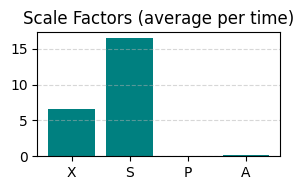

[ 6.62515333 16.4665448   0.04485604  0.11659   ]


In [14]:
#DISPLAY SCALE FACTORS
output_labels = ["X", "S", "P", "A"]

plt.figure(figsize=(3, 2))
plt.bar(output_labels, scale_factors_d, color='teal')
plt.title("Scale Factors (average per time)")

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print(scale_factors_d)

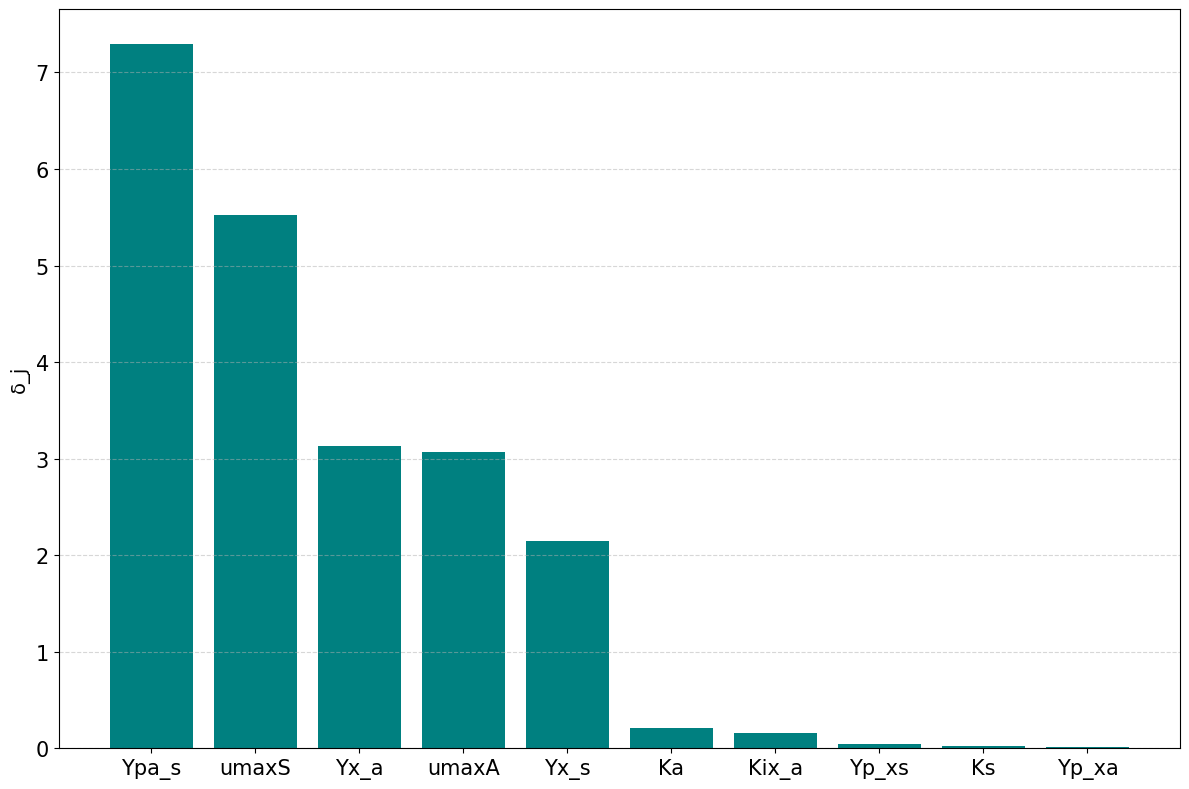

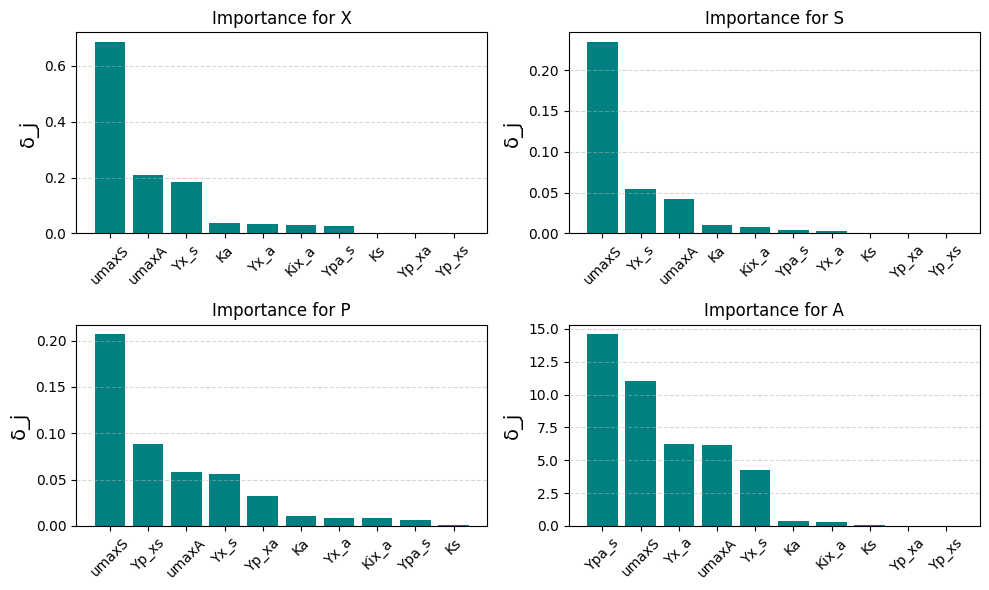

In [15]:
#PLOTING IMPORTANCE
##GLOBAL IMPORTANCE
plt.figure(figsize=(12, 8))
sorted_global = delta_df.sort_values(ascending=False)
plt.bar(sorted_global.index, sorted_global.values, color='teal')
#plt.title("Global Parameter Importance")
plt.ylabel("δ_j", fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##IMPORTANCE BY OUTPUT PER PARAMETER
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

for i, output in enumerate(output_labels):
    sorted_delta = delta_per_output.loc[output].sort_values(ascending=False)
    ax = axes[i]
    ax.bar(sorted_delta.index, sorted_delta.values, color='teal')
    ax.set_title(f"Importance for {output}")
    ax.set_ylabel("δ_j", fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Collinearity Analysis (γ Indexes)

In [16]:
S_normalized = normalize(S, axis=0)

#COLLINEARITY INDEX
def compute_collinearity_index(S, param_names):
    n_params = S.shape[1]
    results = []

    for r in range(1, n_params + 1):                          #SUBSET CAN HAVE FROM 0 TO 9 PARAMETERS
        for indices in combinations(range(n_params), r):
            subset_name = [param_names[i] for i in indices]   #NAME OF SUBSET IS NAME OF PARAMETERS
            S_K = S[:, indices]

            #COLLINEARITY INDEX
            try:
                STS = S_K.T @ S_K                             #CALCULATE MATRIX
                eigvals_real = np.real(eigvalsh(STS))         #CALCULATE EIGENVALUE
                lambda_min = np.min(eigvals_real)             #CALCULATE MINIMUM EIGENVALUE

                if lambda_min <= 0:
                    gamma_K = np.inf
                else:
                    gamma_K = 1 / np.sqrt(lambda_min)          #CALCULATE COLLINEARITY INDEX

            #ERROR CONTROL
            except LinAlgError:
                gamma_K = np.nan

            #SAVE RESULTS
            results.append({
                "subset_size": r,
                "parameters": subset_name,
                "gamma_K": gamma_K
            })

    return pd.DataFrame(results)

#COMPUTE COLLINEARITY INDEX
gamma_df = compute_collinearity_index(S_normalized, parameter_names)

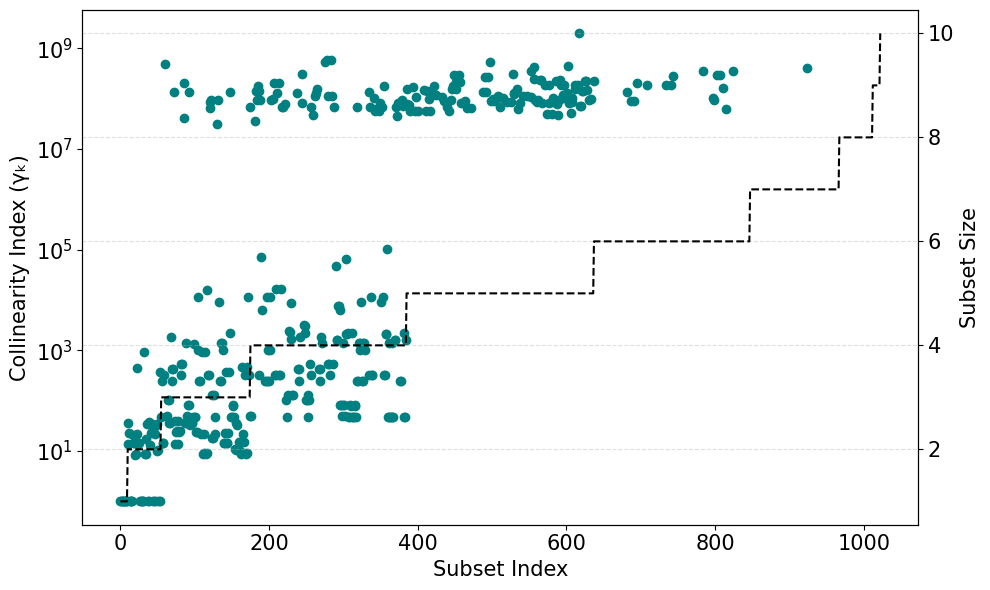

In [17]:
#PLOTTING COLLINEARITY INDEX
gamma_df = gamma_df.sort_values(by="subset_size").reset_index(drop=True)  #ARRANGE GAMMA BY SUBSET SIZE
x_vals = np.arange(len(gamma_df))                                         #X_AXIS = SUBSET INDEX

fig, ax1 = plt.subplots(figsize=(10, 6))

#COLLINEARITY INDEXES (DOTS)
color1 = 'teal'
ax1.scatter(x_vals, gamma_df["gamma_K"], color=color1, label="Collinearity Index")
ax1.set_xlabel("Subset Index", fontsize=15)
ax1.set_ylabel("Collinearity Index (γₖ)", color='black', fontsize = 15)
ax1.tick_params(axis='both', labelcolor='black', labelsize = 15)
#ax2.tick_params(axis='y', labelcolor=color2, labelsize = 15)
ax1.set_yscale('log')

#SUBSET SIZE (DOTTED LINE)
ax2 = ax1.twinx()
color2 = 'black'
ax2.plot(x_vals, gamma_df["subset_size"], color=color2, linestyle='--', label="Subset Size")
ax2.set_ylabel("Subset Size", color=color2, fontsize=15)
ax2.tick_params(axis='y', labelcolor=color2, labelsize = 15)

#plt.title("Collinearity Index (γₖ) vs. Subset Size")
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [18]:
#FILTER SUBSETS ACCORDING TO THRESHOLD
filtered_subsets = gamma_df[(gamma_df["gamma_K"] < 20) & (gamma_df["subset_size"] > 2)]
print(len(filtered_subsets))

#SORT SUBSETS ACCORDING TO 1. SUBSET SIZE, 2. COLLINEARITY INDEX
sorted_subsets = filtered_subsets.sort_values(by=["subset_size", "gamma_K"], ascending=[False,True])

# ORDER INDEXES ACCORDING TO SORTING
top_subsets = sorted_subsets.reset_index(drop=True)
top_subsets["subset_index"] = top_subsets.index

top_subsets_display = top_subsets.copy()
top_subsets_display['parameters'] = top_subsets_display['parameters'].apply(lambda x: ", ".join(x))
top_subsets_display['gamma_K'] = top_subsets_display['gamma_K'].round(4)

top_subsets_display = top_subsets_display[[ "subset_size", "parameters", "gamma_K"]]

display(top_subsets_display.style.set_properties(**{
    'white-space': 'pre-wrap',
    'text-align': 'left'
}))

26


,subset_size,parameters,gamma_K
0,3,"Yp_xs, Ks, Ka",8.806000
1,3,"Yp_xa, Ks, Ka",8.806000
2,3,"umaxS, Yp_xs, Ka",8.888600
3,3,"umaxS, Yp_xa, Ka",8.888600
4,3,"Yp_xs, Ks, Kix_a",8.975300
5,3,"Yp_xa, Ks, Kix_a",8.975300
6,3,"umaxS, Yp_xs, Kix_a",9.061200
7,3,"umaxS, Yp_xa, Kix_a",9.061200
8,3,"Yx_s, Yp_xa, Ka",10.566700
9,3,"Yx_s, Yp_xs, Ka",10.566700


# **Parameter Estimation**

## Weighted Residual Sum of Squares (WRSS)

In [19]:
#DEFINE INITIAL PARAMETER SPACE
parameter_bounds = [
  (1E-03, 1.0),   # umaxS
  (1E-03, 3.0),   # umaxA
  (1E-04, 1),     # Yx_s
  (1E-04, 1),     # Yx_a
  (1E-05, 1E-02), # Yp_xs
  (1E-05, 1),     # Yp_xa
  (1E-03, 1),     # Ypa_s
  (1E-03, 1.0),   # Ks
  (1E-03, 1.0),   # Ka
  (0, 80)         # Kix_a
]

In [20]:
#FUNCTION TO CALCULATE SIMULATED TIME POINTS
def model(theta):
    y_sim_d = odeint(kinetic_model, y0_d, t, args=(theta,))
    return y_sim_d

#COMPUTE WEIGHTS (1/sc_i**2)
W_d = np.diag(1 / scale_factors_d**2)

#INITIAL CONDITIONS
y0_sim_d = [X_d[0], S_d[0], P_d[0], A_d[0]]
print(y0_d)

#INITIALISE RESULTS
results = []

#ESTIMATE PARAMETERS
for subset_index, row in top_subsets.iterrows():                        #RUN THROUGH THE DATA SETS SELECTED (GAMMA < 5)
    subset_params = row['parameters']                                   #IDENTIFY PARAMETERS IN SUBSET
    subset_size = row['subset_size']                                    #IDENTIFY SUBSET SIZE
    subset_indices = [parameter_names.index(p) for p in subset_params]  #FIND INDEXES OF PARAMETERS PRESENT IN THE SUBSET

    #COMPUTE COST FUNCTION
    def objective(subset_theta_values):
        theta_current = Param_chosen.copy()
        for i, idx in enumerate(subset_indices):
            theta_current[idx] = subset_theta_values[i]

        #GENERATE MODEL TIME POINTS
        y_sim_d = odeint(kinetic_model, y0_sim_d, t_d, args=(theta_current,))
        eta_sim = y_sim_d.T #MATCH SHAPE

        #COMPUTE RESIDUALS
        residuals = Y_d - eta_sim
        wrss = np.trace(residuals.T @ W_d @ residuals)

        return wrss

    #ESTABISH INITIAL GUESS AND BOUNDS
    initial_guess = [Param_chosen[i] for i in subset_indices]
    subset_bounds = [parameter_bounds[parameter_names.index(p)] for p in subset_params]

    #ESTIMATE PARAMETERS BASED ON MINIMIZATION
    res = minimize(objective, initial_guess, method='trust-constr', bounds=subset_bounds)

    results.append({
        "subset_index": subset_index,
        "subset_size": subset_size,
        "subset": subset_params,
        "wrss": res.fun,
        "estimated_params": res.x,
        "success": res.success
    })

[np.float64(0.0852), np.float64(27.30434668), np.float64(0.006117156), 0]


/tmp/ipython-input-20-1768225225.py:29: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y_sim_d = odeint(kinetic_model, y0_sim_d, t_d, args=(theta_current,))
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_differentiable_functions.py:317: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


In [21]:
table_rows = []

for result in results:
    # FILTER SUCCESSFUL RESULTS
    if result['success']:
        subset = result['subset']
        estimated_params = result['estimated_params']
        wrss = result['wrss']

        # INITIALIZE AT NaN
        row_data = {p: np.nan for p in parameter_names}

        for param, value in zip(subset, estimated_params):
            row_data[param] = value
        row_data['WRSS'] = wrss
        row_data['subset_size'] = result['subset_size']
        row_data['subset_index'] = result['subset_index']
        table_rows.append(row_data)

results_df = pd.DataFrame(table_rows)

# FILTER  WRSS < 100
results_df = results_df[results_df['WRSS'] <= 100]

# SORT
results_df_sorted = results_df.sort_values(by=["WRSS", "subset_index"], ascending=[True, True])
results_df_sorted = results_df_sorted.reset_index(drop=True)

# HIGHLIGHT FUNCTION
def highlight_estimated_and_bound(s):
    styles = []
    for param, value in s.items():
        if param in parameter_names:
            param_idx = parameter_names.index(param)
            lower_bound, upper_bound = parameter_bounds[param_idx]
            if pd.notna(value):
                if round(value, 6) == lower_bound or round(value, 6) == upper_bound:
                    styles.append('background-color: red')
                else:
                    styles.append('background-color: royalblue')
            else:
                styles.append('')
        else:
            styles.append('')
    return styles

# DISPLAY
param_columns = parameter_names
styled_results = results_df_sorted.style.apply(
    highlight_estimated_and_bound,
    subset=param_columns,
    axis=1
)

display(styled_results)

,umaxS,umaxA,Yx_s,Yx_a,Yp_xs,Yp_xa,Ypa_s,Ks,Ka,Kix_a,WRSS,subset_size,subset_index
0,nan,2.224308,0.257161,nan,nan,0.010635,nan,nan,nan,nan,25.385681,3,25
1,nan,2.222709,0.257272,nan,0.008623,nan,nan,nan,nan,nan,25.394534,3,24
2,nan,nan,nan,0.102667,0.004858,nan,nan,nan,0.014250,nan,61.247722,3,17
3,nan,nan,nan,nan,nan,0.025383,0.190468,nan,0.001508,nan,61.495903,3,21
4,nan,nan,nan,nan,0.004882,nan,0.197985,nan,0.002266,nan,61.518448,3,20
5,nan,nan,nan,0.045756,nan,0.057299,nan,nan,0.181703,nan,66.047029,3,16
6,nan,nan,nan,0.028658,0.005360,nan,nan,nan,nan,39.601162,66.888198,3,19
7,nan,nan,nan,0.028403,nan,0.094426,nan,nan,nan,39.613958,66.943519,3,18
8,nan,nan,nan,nan,0.005428,nan,0.050577,nan,nan,79.936603,68.751842,3,23
9,nan,nan,nan,nan,nan,0.106571,0.050657,nan,nan,79.938378,69.939770,3,22


In [22]:
#ADD FIXED PARAMETERS TO EACH SUBSET
param_sets_full = []
wrss_values = []

subset_4params = results_df_sorted[results_df_sorted['subset_size'] >= 0]

for _, row in subset_4params.iterrows():
    full_param_set = Param_chosen.copy()
    estimated_flags = [False] * len(parameter_names)

    for param in parameter_names:
        if not pd.isna(row[param]):
            idx = parameter_names.index(param)
            full_param_set[idx] = row[param]
            estimated_flags[idx] = True

    param_sets_full.append(full_param_set)
    wrss_values.append(row["WRSS"])

param_sets_df = pd.DataFrame(param_sets_full, columns=parameter_names)
param_sets_df["WRSS"] = wrss_values

def highlight_params(val, row_idx, col_name):
    if col_name == "WRSS":
        return ''
    param_idx = parameter_names.index(col_name)
    est_val = param_sets_df.iloc[row_idx, param_idx]
    nominal_val = Param_chosen[param_idx]
    lower, upper = parameter_bounds[param_idx]

    if np.isclose(est_val, lower, atol=1e-6) or np.isclose(est_val, upper, atol=1e-6):
        return 'background-color: red'
    elif np.isclose(est_val, nominal_val, atol=1e-6):
        return 'background-color: lightgray'
    else:
        return 'background-color: royalblue'

def style_rows(df):
    styled = pd.DataFrame('', index=df.index, columns=df.columns)
    for row_idx in df.index:
        for col_name in df.columns:
            styled.loc[row_idx, col_name] = highlight_params(df.loc[row_idx, col_name], row_idx, col_name)
    return styled

styled = param_sets_df.style.apply(style_rows, axis=None)

In [23]:
# SELECT SUBSET
best_row = param_sets_df.iloc[0]  # FIRST ROW IS THE LOWEST WRSS

param_0 = best_row[parameter_names].values.tolist()

print("param_0 =", np.round(param_0, 6))

param_0 = [3.800000e-01 2.224308e+00 2.571610e-01 6.000000e-01 2.200000e-03
 1.063500e-02 1.200000e+00 1.100000e-01 2.400000e-01 3.960000e+01]


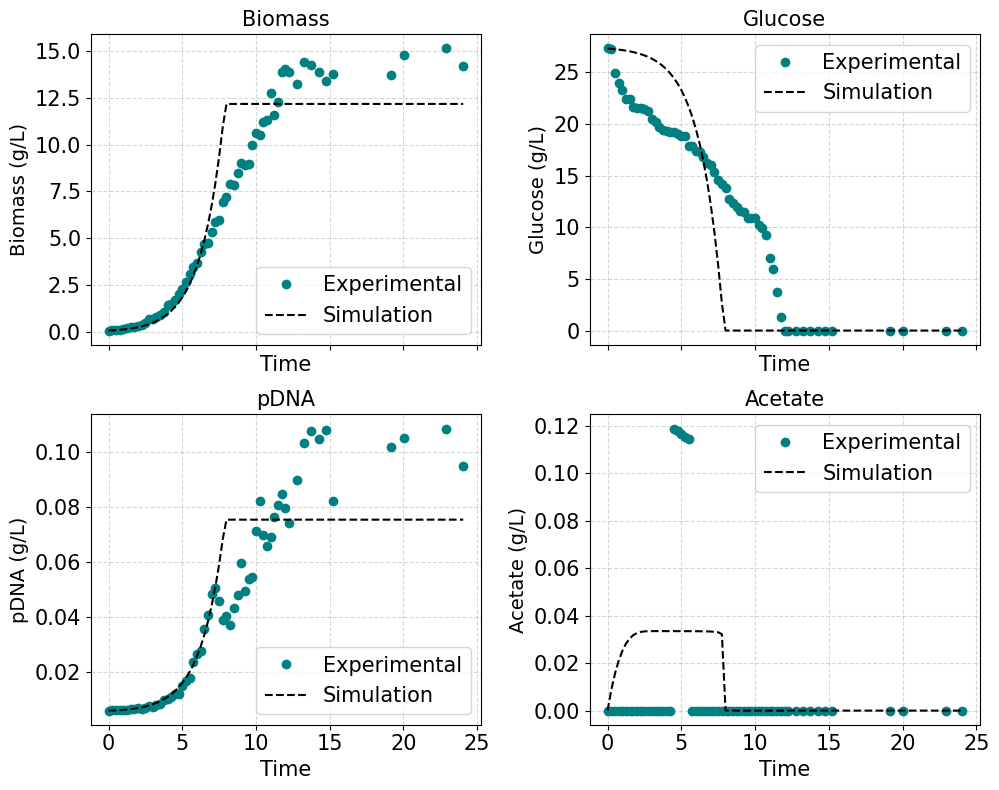

In [24]:
# SIMULATE DATA WITH PARAMS
y_estim_d = odeint(kinetic_model, y0_d, t_d, args=(param_0,))
y_estim_d = y_estim_d.T

# PLOTTING SIMULATION VS ESTIMATION DATA
keys = ["X", "S", "P", "A"]
labels = ['Biomass', 'Glucose', 'pDNA', 'Acetate']

fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
axs = axs.flatten()

for i in range(4):
    key = keys[i]
    axs[i].plot(t_exp, Y_d[i, :], 'o', label='Experimental', color='teal')
    axs[i].plot(t_exp, y_estim_d[i, :], '--', label='Simulation', color='black')

    axs[i].set_title(labels[i], fontsize=15)
    axs[i].set_xlabel('Time', fontsize=15)
    axs[i].set_ylabel(f'{labels[i]} (g/L)', fontsize=14)

    axs[i].tick_params(axis='both', labelsize=15)
    axs[i].legend(fontsize=15)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



Final WRSS: 25.3857
X Weighted NRMSE: 0.0773
S Weighted NRMSE: 0.1504
P Weighted NRMSE: 0.1221
A Weighted NRMSE: 0.0732
Mean NRMSE across all outputs: 0.1058
X R²: 0.8812
S R²: 0.4228
P R²: 0.7972
A R²: 0.0414


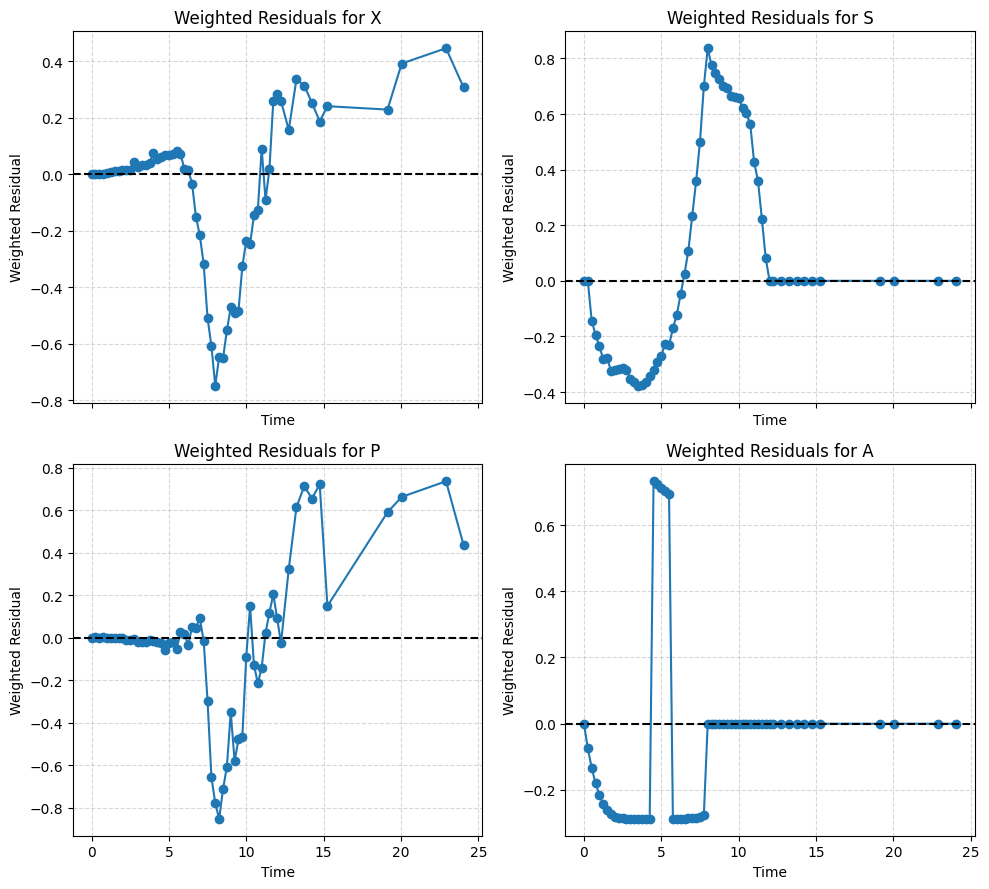

In [25]:
#CALCULATE WRSS FOR PREVIOUS SIMULATION
residuals_d = Y_d - y_estim_d

# WRSS
W = np.diag(1 / scale_factors_d**2)
wrss_d = np.trace(residuals_d.T @ W @ residuals_d)
print(f"\nFinal WRSS: {wrss_d:.4f}")

nrmse_per_output = []
labels = ["X", "S", "P", "A"]

for i in range(4):
    residuals_i = Y_d[i, :] - y_estim_d[i, :]
    weighted_mse = np.mean((residuals_i / scale_factors_d[i])**2)
    nrmse = weighted_mse
    nrmse_per_output.append(nrmse)
    print(f"{labels[i]} Weighted NRMSE: {nrmse:.4f}")

mean_nrmse = np.mean(nrmse_per_output)
print(f"Mean NRMSE across all outputs: {mean_nrmse:.4f}")

r2_per_output = []
for i in range(4):
    r2 = r2_score(Y_d[i, :], y_estim_d[i, :])
    r2_per_output.append(r2)
    print(f"{labels[i]} R²: {r2:.4f}")

fig, axs = plt.subplots(2, 2, figsize=(10, 9), sharex=True)
axs = axs.flatten()

for i in range(4):
    weighted_residuals = (Y_d[i, :] - y_estim_d[i, :]) / scale_factors_d[i]
    axs[i].plot(t_exp, weighted_residuals, 'o-', color='tab:blue')
    axs[i].axhline(0, color='black', linestyle='--')
    axs[i].set_title(f'Weighted Residuals for {labels[i]}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Weighted Residual')
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Interval of Confidence

In [26]:
from scipy.optimize import approx_fprime
from scipy.stats import t
import numpy as np
import pandas as pd

#CALCULATE ICs
output_indices = {"X": 0, "S": 1, "P": 2, "A": 3}

Y_IC = {
    "X": X_d,
    "S": S_d,
    "P": P_d,
    "A": A_d,
}

#DEFINE RELATIVE ERRORS
relative_errors = {
    "X": 0.20,
    "S": 0.05,
    "P": 0.10,
    "A": 0.05,
}

sigma_sq = np.array([
    (relative_errors[var] * scale_factors_d[i])**2
    for i, var in enumerate(["X", "S", "P", "A"])
])


y0_d = [X_d[0], S_d[0], P_d[0], 0.0]

#EXTRACT PARAMETERS
row1 = results_df_sorted.iloc[0]
estimated_indices = [i for i, p in enumerate(parameter_names) if not pd.isna(row1[p])]
theta_nominal = [row1[parameter_names[i]] for i in estimated_indices]

row2 = param_sets_df.iloc[0]
fixed_params = [row2[p] if i not in estimated_indices else None for i, p in enumerate(parameter_names)]
labels = [parameter_names[i] for i in estimated_indices]

def insert_theta_into_param_vector(theta, fixed):
    full = []
    j = 0
    for f in fixed:
        if f is None:
            full.append(theta[j])
            j += 1
        else:
            full.append(f)
    return full

def compute_full_jacobian(theta, output_indices, t_d, y0, fixed_params):
    jacobians = {var: np.zeros((len(t_d), len(theta))) for var in output_indices}
    for var_name, idx in output_indices.items():
        for i in range(len(t_d)):
            def model_func(th):
                full_params = insert_theta_into_param_vector(th, fixed_params)
                return model(t_d, y0_d, full_params)[i, idx]
            epsilon = 1e-5
            jacobians[var_name][i, :] = approx_fprime(theta, model_func, epsilon)
    return jacobians

def model(t, y0, params):
    return odeint(kinetic_model, y0, t, args=(params,))

def simulate_model(t, theta, fixed_params, y0):
    full_params = insert_theta_into_param_vector(theta, fixed_params)
    y_sim = model(t, y0, full_params)
    return y_sim

#SIMULATE MODEL AND RESIDUAL VARIANCE
y_model_IC = simulate_model(t_d, theta_nominal, fixed_params, y0_d)

residual_var = {}
for var, idx in output_indices.items():
    residuals = Y_IC[var] - y_model_IC[:, idx]
    residual_var[var] = np.var(residuals, ddof=1)

#COMBINE JACOBIANS
jacobians = compute_full_jacobian(theta_nominal, output_indices, t_d, y0_d, fixed_params)
J_total = np.vstack([jacobians[var] for var in output_indices])

T = len(t_d)
W_diag = np.repeat(1 / sigma_sq, T)
W_cov = np.diag(W_diag)

#CALCULATE COVARIANCE MATRIX
N = len(t_d)
M = len(theta_nominal)
Q = M
cov_theta = np.linalg.inv(J_total.T @ W_cov @ J_total) / (N * len(output_indices) - Q)

#CALCULATE CONFIDENCE INTERVALS
alpha = 0.05
t_val = t.ppf(1 - alpha / 2, df=N * len(output_indices) - Q)
std_errors = np.sqrt(np.diag(cov_theta))
theta_lower = np.array(theta_nominal) - t_val * std_errors
theta_upper = np.array(theta_nominal) + t_val * std_errors

#SAVE RESULTS
ci_param_df = pd.DataFrame({
    'Parameter': labels,
    'Estimate': theta_nominal,
    'Lower 95% CI': theta_lower,
    'Upper 95% CI': theta_upper,
    'Error 95% CI': theta_upper-theta_nominal,
    'Error  %': (theta_nominal-theta_lower)/theta_nominal*100
})

#DISPLAY
def highlight_ci_bounds(s):
    styles = []
    for col, val in s.items():
        if col == 'Estimate':
            styles.append('color: black')
        elif col == 'Lower 95% CI' or col == 'Upper 95% CI':
            styles.append('background-color: lightblue')
        else:
            styles.append('')
    return styles

styled_ci = ci_param_df.style\
    .apply(highlight_ci_bounds, axis=1)\
    .format(precision=6)

display(styled_ci)

,Parameter,Estimate,Lower 95% CI,Upper 95% CI,Error 95% CI,Error %
0,umaxA,2.224308,2.215778,2.232837,0.008529,0.383455
1,Yx_s,0.257161,0.256727,0.257595,0.000434,0.168739
2,Yp_xa,0.010635,0.010605,0.010664,0.000029,0.276648


# **Uncertainty analysis**

In [27]:
#CORRELATION MATRIX
std_devs = np.sqrt(np.diag(cov_theta))
corr_matrix = cov_theta / np.outer(std_devs, std_devs)
corr_df = pd.DataFrame(corr_matrix, index=labels, columns=labels)

#DISPLAY
cmap = mcolors.LinearSegmentedColormap.from_list("white_teal", ["white", "teal"])

styled_corr = corr_df.style\
    .background_gradient(cmap=cmap, axis=None, vmin=0, vmax=np.abs(corr_df.values).max(), gmap=np.abs(corr_df.values))\
    .format(precision=3)

display(styled_corr)

,umaxA,Yx_s,Yp_xa
umaxA,1.000,0.227,-0.189
Yx_s,0.227,1.000,-0.719
Yp_xa,-0.189,-0.719,1.000


In [28]:
#DEFINITION OF PARAMETER SPACE
param_bounds = []

for i, name in enumerate(parameter_names):
    if i in estimated_indices:
        idx = estimated_indices.index(i)
        lower = theta_lower[idx]
        upper = theta_upper[idx]
    else:
        nominal = row2[name]
        lower = nominal * 0.7
        upper = nominal * 1.3
    param_bounds.append((lower, upper))

#GENERATE SAMPLES BY LATIN HYPERCUBE
n_samples = 1000
dim = len(parameter_names)
sampler = qmc.LatinHypercube(d=dim)
sample_unit = sampler.random(n=n_samples)

param_samples = np.zeros_like(sample_unit)
for i, (lower, upper) in enumerate(param_bounds):
    scaled = qmc.scale(sample_unit[:, [i]], lower, upper)
    param_samples[:, i] = scaled[:, 0]

#CHOLESKY DECOMPOSITION
corr_est = corr_matrix
chol = np.linalg.cholesky(corr_est)

#SAMPLE FROM MULTIVARIATE NORMAL DISTRIBUTION
normal_samples = np.random.normal(size=(n_samples, len(estimated_indices)))
correlated_normals = normal_samples @ chol.T

#CONVERT TO UNIFORM SAMPLES
uniform_est = norm.cdf(correlated_normals)

#RESCALE TO BOUNDS
for j, idx in enumerate(estimated_indices):
    low, high = param_bounds[idx]
    param_samples[:, idx] = low + (high - low) * uniform_est[:, j]

#SIMULATE MODEL
Y_cov = []

for k in range(n_samples):
    full_param_vec = param_samples[k, :]
    y_out = model(t_d, y0_d, full_param_vec)
    Y_cov.append(y_out)

Y_cov = np.array(Y_cov)

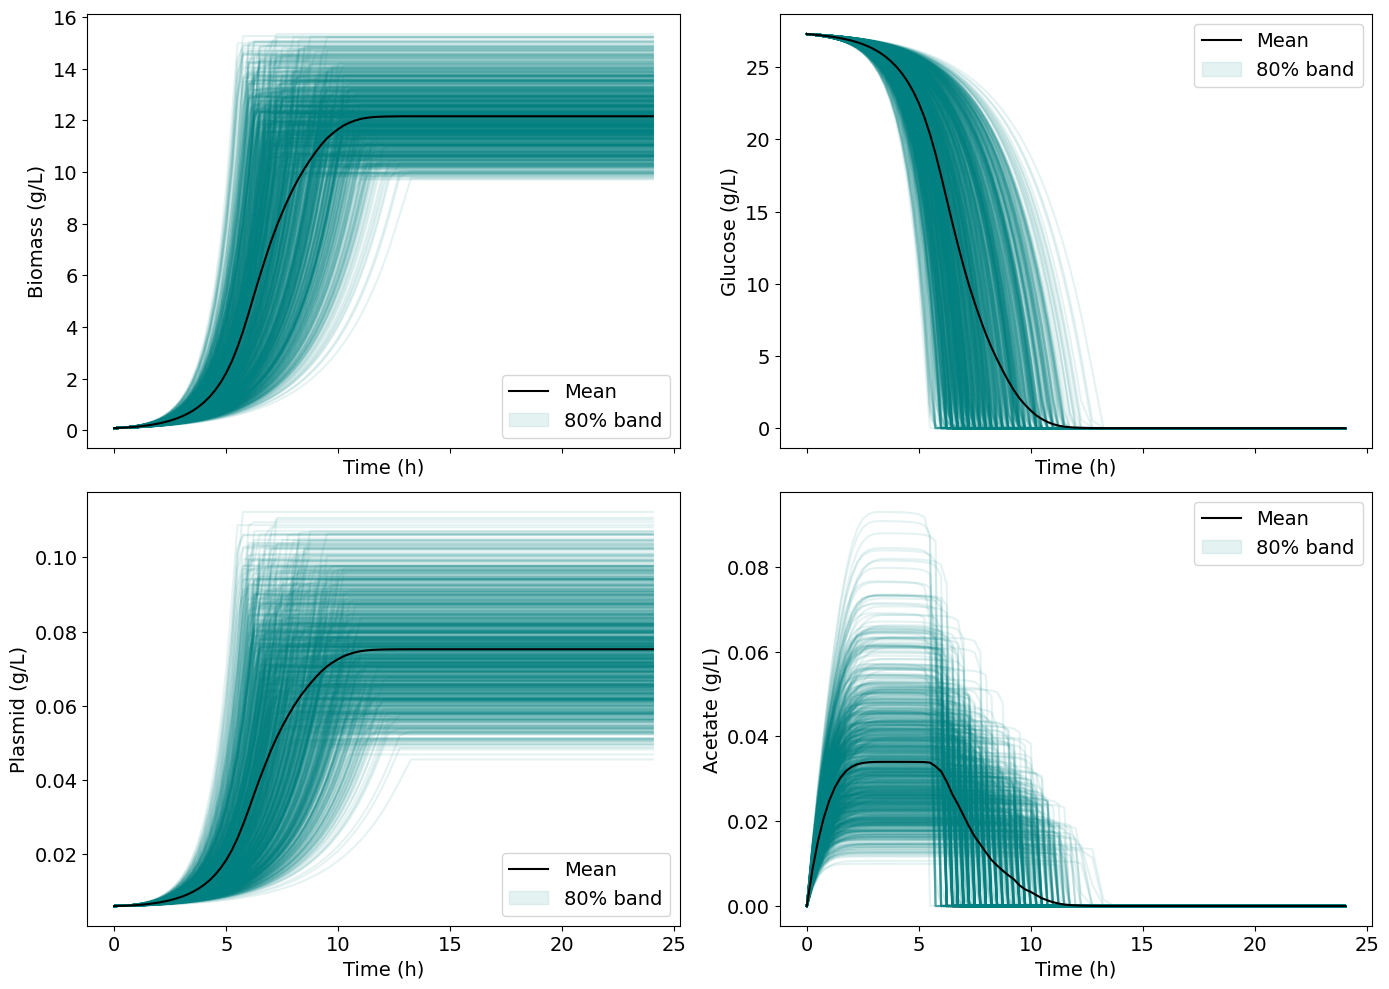

In [29]:
#DISPLAY
var_labels = {
    "X": "Biomass",
    "S": "Glucose",
    "P": "Plasmid",
    "A": "Acetate"
}

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axs = axs.flatten()

for i, (var, idx) in enumerate(output_indices.items()):
    var_data = Y_cov[:, :, idx]
    for y in var_data:
        axs[i].plot(t_d, y, color='teal', alpha=0.1)
    p10 = np.percentile(var_data, 10, axis=0)
    p90 = np.percentile(var_data, 90, axis=0)
    mean = np.mean(var_data, axis=0)

    axs[i].plot(t_d, mean, label='Mean', color='black')
    axs[i].fill_between(t_d, p10, p90, alpha=0.1, color='teal', label='80% band')
    #axs[i].scatter(t_d, Y_d[idx], color='black', label='Experimental', s=5)

    #axs[i].set_title(f'{var_labels[var]}')
    axs[i].set_xlabel("Time (h)", fontsize = 14)
    axs[i].set_ylabel(f"{var_labels[var]} (g/L)", fontsize = 14)
    axs[i].tick_params(axis='both', labelsize=14)
    axs[i].legend(fontsize = 14)

plt.tight_layout()
plt.show()


# **Global Sensitivity Analysis**

In [30]:
#SET UP MORRIS
param_bounds = []

for i, name in enumerate(parameter_names):
    if i in estimated_indices:
        idx = estimated_indices.index(i)
        lower = theta_lower[idx]
        upper = theta_upper[idx]
    else:
        nominal = row2[name]
        lower = nominal * 0.7
        upper = nominal * 1.3
    param_bounds.append((lower, upper))

problem = {
    'num_vars': len(parameter_names),
    'names': parameter_names,
    'bounds': param_bounds
}

#GENERATE MORRIS SAMPLES
# r = 90 trajectories : N = r * (k + 1) simulations
r = 90
param_values = morris_sample.sample(problem, N=r, num_levels=8, optimal_trajectories=None)

#SIMULATE MODEL
def simulate_scalar_outputs_separate(params):
    y = odeint(kinetic_model, y0_d, t_d, args=(params,))
    mean_outputs = np.array([
        np.mean(y[:, i][y[:, i] != 0]) if np.any(y[:, i] != 0) else 0.0    #AVERAGE CALCULATED AS PREVIOUS (EXCLUDE 0s)
        for i in range(y.shape[1])
    ])
    weighted = mean_outputs / scale_factors_d
    return weighted

Y_m = np.array([simulate_scalar_outputs_separate(sample) for sample in param_values])

#MORRIS ANALYSIS
morris_results = {}
for i, var in enumerate(["X", "S", "P", "A"]):
    Si = morris_analyze.analyze(
        problem=problem,
        X=param_values,
        Y=Y_m[:, i],
        num_levels=8,
        conf_level=0.95,
        print_to_console=False
    )
    df = pd.DataFrame({
        'Parameter': problem['names'],
        'μ* (mean EE)': Si['mu_star'],
        'σ (std dev)': Si['sigma'],
        'μ (mean)': Si['mu']
    }).sort_values(by='μ* (mean EE)', ascending=False).reset_index(drop=True)
    morris_results[var] = df


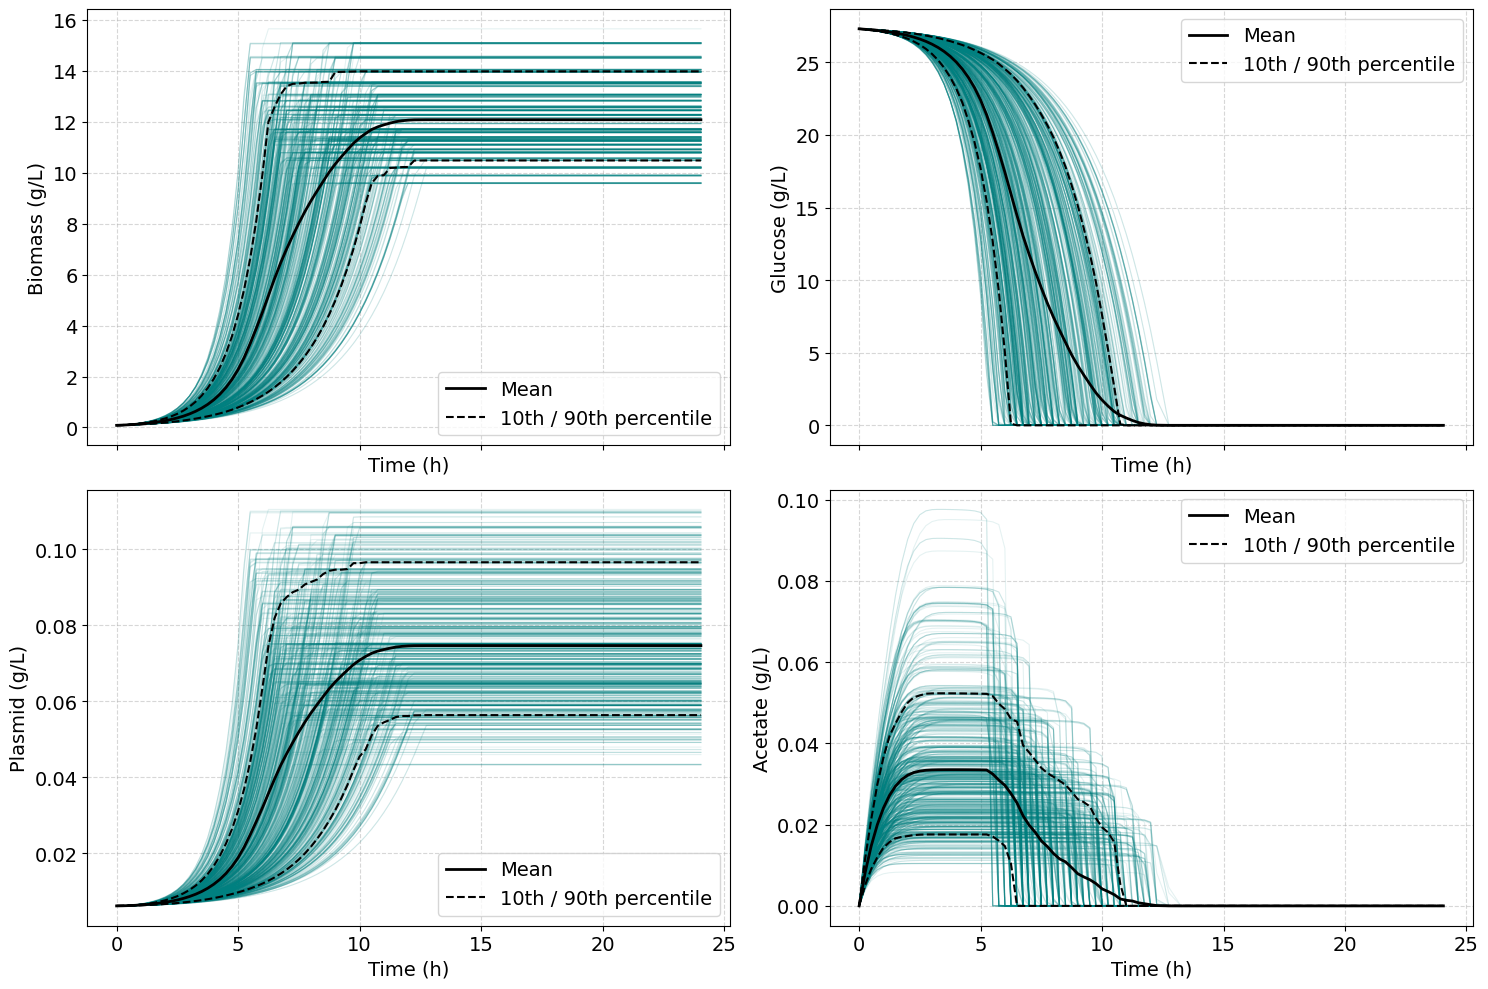

In [31]:
#DISPLAY RESULTS FOR MORRIS
Y_morris_cov = []

for params in param_values:
    y_out = odeint(kinetic_model, y0_d, t_d, args=(params,))
    Y_morris_cov.append(y_out)

Y_morris_cov = np.array(Y_morris_cov)
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axs = axs.flatten()

for i, (var, idx) in enumerate(output_indices.items()):
    var_data = Y_morris_cov[:, :, idx]

    for y in var_data:
        axs[i].plot(t_d, y, color='teal', alpha=0.1, linewidth=0.8)

    mean = np.mean(var_data, axis=0)
    p10 = np.percentile(var_data, 10, axis=0)
    p90 = np.percentile(var_data, 90, axis=0)

    axs[i].plot(t_d, mean, color='black', label='Mean', linewidth=2)
    axs[i].plot(t_d, p10, color='black', linestyle='--', label='10th / 90th percentile')
    axs[i].plot(t_d, p90, color='black', linestyle='--')

    #axs[i].set_title(f"{var_labels[var]}")
    axs[i].set_xlabel("Time (h)", fontsize = 14)
    axs[i].set_ylabel(f"{var_labels[var]} (g/L)", fontsize=14)
    axs[i].legend(fontsize = 14)
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.show()

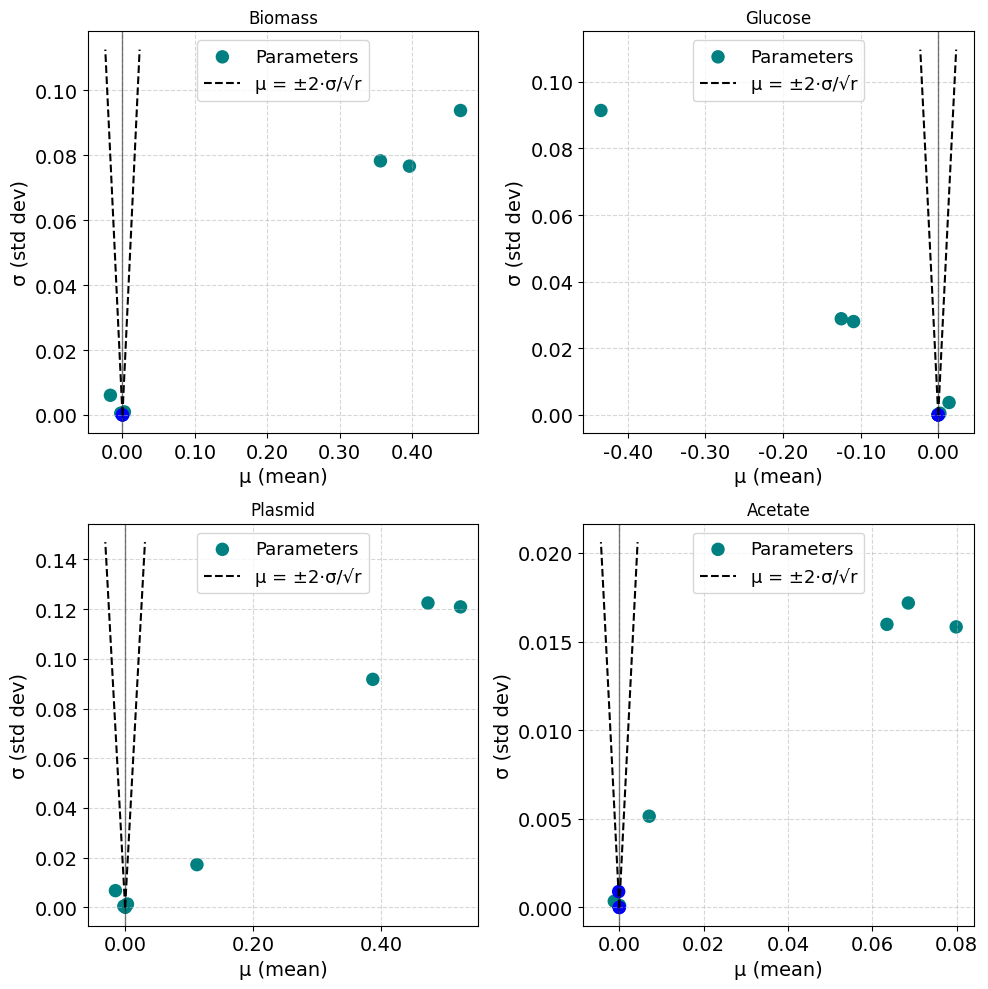

Insignificant Parameters:
- Yp_xa : Biomass
- Yp_xs : Biomass
- Yp_xa : Glucose
- Yp_xs : Glucose
- Ks : Acetate
- Yp_xa : Acetate
- Yp_xs : Acetate


In [32]:
import matplotlib.ticker as ticker

#GRAPH WEDGE MORRIS ANALYSIS
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

inside_wedge_summary = []

for i, var in enumerate(["X", "S", "P", "A"]):
    df = morris_results[var]
    ax = axs[i]

    #RESUTS
    mu = df['μ (mean)'].values
    sigma = df['σ (std dev)'].values
    labels = df['Parameter'].values

    point_colors = [
        'blue' if abs(mu[j]) <= 2 * sigma[j] / np.sqrt(r) else 'teal'
        for j in range(len(mu))
    ]

    for j in range(len(mu)):
      if point_colors[j] == 'blue':
          inside_wedge_summary.append((labels[j], var_labels[var]))

    ax.scatter(mu, sigma, color=point_colors, label='Parameters', s=75)

    #PLOT WEDGE
    sigma_vals = np.linspace(0, max(sigma) * 1.2, 300)
    wedge_mu = 2 * sigma_vals / np.sqrt(r)
    ax.plot(wedge_mu, sigma_vals, linestyle='--', color='black', label='μ = ±2·σ/√r')
    ax.plot(-wedge_mu, sigma_vals, linestyle='--', color='black')

    ax.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax.set_xlabel('μ (mean)', fontsize=14)
    ax.set_ylabel('σ (std dev)', fontsize=14)
    ax.set_title(var_labels[var])
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper center', fontsize=13)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))


plt.tight_layout()
plt.show()

#PRINT INSIGNIFICANT RESULTS
print("Insignificant Parameters:")
for param, output in inside_wedge_summary:
    print(f"- {param} : {output}")


In [33]:
#PARAMETER RANKING ACCORDING TO ABSOLUTE MEAN
def highlight_zero(val):
    return 'background-color: lightgrey' if val == 0 else ''

for var in ["X", "S", "P", "A"]:
    df = morris_results[var].copy()
    df = df[["Parameter", "μ* (mean EE)", "σ (std dev)"]].round(6)

    print(f"\n{var_labels[var]}")
    styled_df = df.style.map(highlight_zero, subset=["μ* (mean EE)", "σ (std dev)"])
    display(styled_df)


Biomass


,Parameter,μ* (mean EE),σ (std dev)
0,umaxS,0.467095,0.093793
1,Ypa_s,0.396539,0.076655
2,Yx_a,0.356472,0.078276
3,Ka,0.016666,0.006060
4,Yx_s,0.002712,0.000930
5,Ks,0.002347,0.000546
6,Kix_a,0.000339,0.000148
7,umaxA,0.000238,0.000094
8,Yp_xa,0.000000,0.000000
9,Yp_xs,0.000000,0.000000



Glucose


,Parameter,μ* (mean EE),σ (std dev)
0,umaxS,0.434735,0.091401
1,Ypa_s,0.124982,0.028882
2,Yx_a,0.109112,0.028041
3,Ka,0.013980,0.003733
4,Ks,0.002150,0.000517
5,Yx_s,0.000595,0.000138
6,Kix_a,0.000310,0.000108
7,umaxA,0.000199,0.000059
8,Yp_xa,0.000000,0.000000
9,Yp_xs,0.000000,0.000000



Plasmid


,Parameter,μ* (mean EE),σ (std dev)
0,Ypa_s,0.523973,0.120877
1,Yx_a,0.473136,0.122439
2,umaxS,0.386984,0.091739
3,Yp_xs,0.112197,0.017212
4,Ka,0.015108,0.006758
5,Yp_xa,0.003633,0.001379
6,Yx_s,0.002319,0.000996
7,Ks,0.001989,0.000532
8,Kix_a,0.000289,0.000152
9,umaxA,0.000216,0.000102



Acetate


,Parameter,μ* (mean EE),σ (std dev)
0,Ka,0.079861,0.015828
1,Ypa_s,0.068518,0.017177
2,Yx_a,0.063449,0.015971
3,umaxS,0.007109,0.005149
4,umaxA,0.001180,0.000352
5,Ks,0.000688,0.000896
6,Yx_s,0.000077,0.000109
7,Kix_a,0.000051,0.000082
8,Yp_xa,0.000000,0.000000
9,Yp_xs,0.000000,0.000000


#**Plotting**

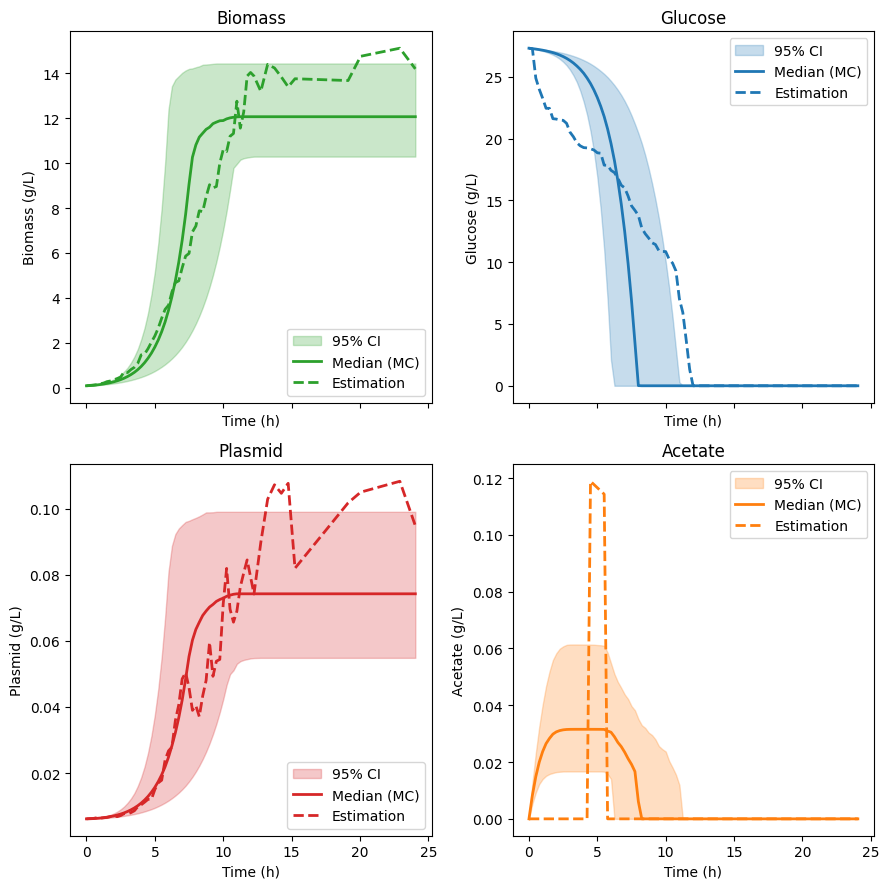

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9), sharex=True)
axs = axs.flatten()

colors = {
    "X": 'tab:green',
    "S": 'tab:blue',
    "P": 'tab:red',
    "A": 'tab:orange'
}

for i, (var, idx) in enumerate(output_indices.items()):
    var_color = colors[var]
    var_data = Y_cov[:, :, idx]
    p5 = np.percentile(var_data, 5, axis=0)
    p95 = np.percentile(var_data, 95, axis=0)
    median = np.median(var_data, axis=0)

    #95% CONFIDENCE
    axs[i].fill_between(t_d, p5, p95, alpha=0.25, color=var_color, label="95% CI")

    #MONTE CARLO MEDIAN
    axs[i].plot(t_d, median, color=var_color, label='Median (MC)', linewidth=2)

    #ESTIMATION SIMULATION
    axs[i].plot(t_d, Y_d[idx], linestyle='--', color=var_color, label='Estimation', linewidth=2)

    #TESTING BATCH DATA
    #axs[i].scatter(t_t, Y_t[idx], color=var_color, edgecolor='black', s=20, label='Testing')

    axs[i].set_title(f"{var_labels[var]}")
    axs[i].set_xlabel("Time (h)")
    axs[i].set_ylabel(f"{var_labels[var]} (g/L)")
    axs[i].legend()
    axs[i].tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()

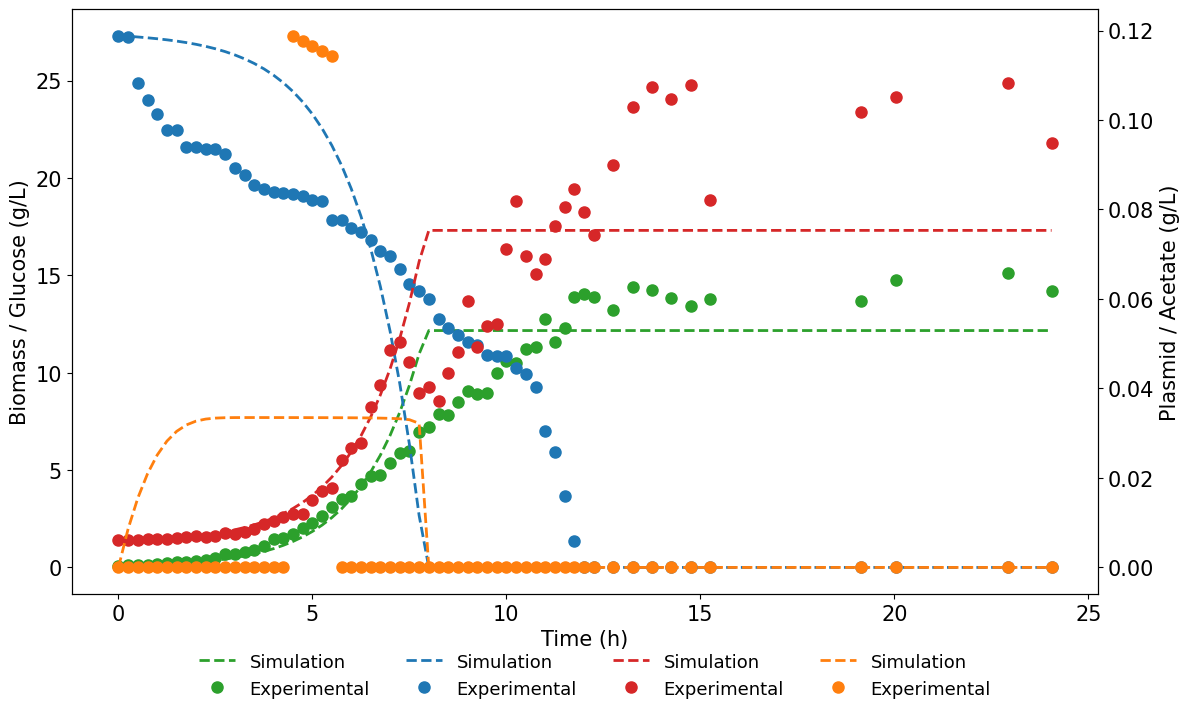

In [35]:
#ESTIMATION DATA PLOTTED WITH SIMULATION
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

for i, (var, idx) in enumerate(output_indices.items()):
    var_color = colors[var]
    var_data = Y_cov[:, :, idx]
    p5 = np.percentile(var_data, 5, axis=0)
    p95 = np.percentile(var_data, 95, axis=0)
    median = np.median(var_data, axis=0)
    current_ax = ax2 if var == "P" or var == "A" else ax1

    # 95% confidence band
    #current_ax.fill_between(t_d, p5, p95, alpha=0.25, color=var_color, label=f"{var_labels[var]} 95% CI")

    # Median prediction from Monte Carlo
    #current_ax.plot(t_d, median, color=var_color, label=f'{var_labels[var]} Median (MC)', linewidth=2)
    current_ax.plot(t_exp, y_estim_d[i, :], '--', color=var_color, label='Simulation', linewidth=2)
    # Estimation prediction
    #current_ax.plot(t_d, Y_d[idx], linestyle='', color=var_color, label=f'{var_labels[var]}')
    current_ax.plot(t_d, Y_d[i], 'o', label='Experimental',  color=var_color, markersize=8)
    # Testing data
    #current_ax.scatter(t_t, Y_t[idx], color=var_color, edgecolor='black', s=20, label=f'{var_labels[var]} Testing')

ax1.set_xlabel("Time (h)", fontsize=15)
ax1.set_ylabel("Biomass / Glucose (g/L)", fontsize=15)
ax2.set_ylabel("Plasmid / Acetate (g/L)", fontsize=15)
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

fig.legend(lines_1 + lines_2, labels_1 + labels_2,
           loc='lower center', bbox_to_anchor=(0.5, 0.10),
           ncol=4, fontsize=13, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

# **Testing Batch**

In [36]:
#SIMULATE MODEL WITH PARAMETERS
Y_t = np.array([X_t, S_t, P_t, A_t])
y0_t = [X_t[0], S_t[0], P_t[0], A_t[0]]
y_sim_t = odeint(kinetic_model, y0_t, t_d, args=(param_0,))
y_sim_t_T = y_sim_t.T
print(Y_t)

[[1.20000000e-01 6.40000000e-01 1.92000000e+00 4.00000000e+00
  5.60000000e+00 7.20000000e+00 8.00000000e+00 8.26000000e+00]
 [2.00000000e+01 1.95000000e+01 1.90077525e+01 4.97024550e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e-03 6.39016250e-03 1.17803250e-02 2.58436500e-02
  4.89189500e-02 5.90695000e-02 7.13700000e-02 8.73193180e-02]
 [0.00000000e+00 0.00000000e+00 4.98440000e-02 1.01319000e-01
  8.32060000e-02 9.28180000e-02 0.00000000e+00 0.00000000e+00]]


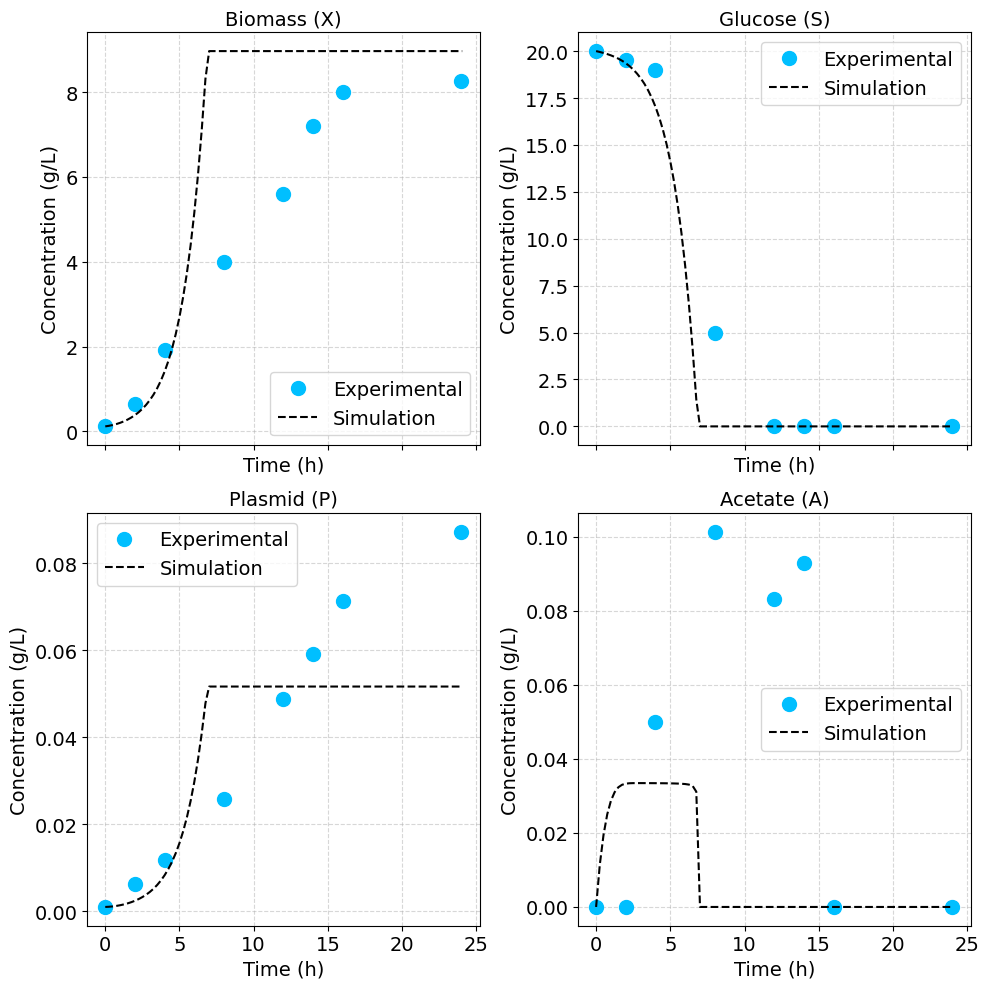

In [37]:
#PLOT SIMULATIO VS TESTING BATCH DATA
labels = ['Biomass (X)', 'Glucose (S)', 'Plasmid (P)', 'Acetate (A)']
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
axs = axs.flatten()

for i in range(4):
    axs[i].plot(t_t, Y_t[i], 'o', label='Experimental', color='deepskyblue', markersize= 10)
    axs[i].plot(t_d, y_sim_t_T[i], '--', label='Simulation', color='black')
    axs[i].set_title(labels[i], fontsize = 14)
    axs[i].set_xlabel('Time (h)', fontsize = 14)
    axs[i].set_ylabel('Concentration (g/L)', fontsize = 14)
    axs[i].legend(fontsize = 14)
    axs[i].tick_params(axis='both', labelsize=14)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.show()


WRSS on new dataset: 7.8146
Biomass (X) - Weighted NRMSE: 0.2560 | R²: 0.4613
Glucose (S) - Weighted NRMSE: 0.0142 | R²: 0.9568
Plasmid (P) - Weighted NRMSE: 0.1988 | R²: 0.6695
Acetate (A) - Weighted NRMSE: 0.5078 | R²: -0.8234


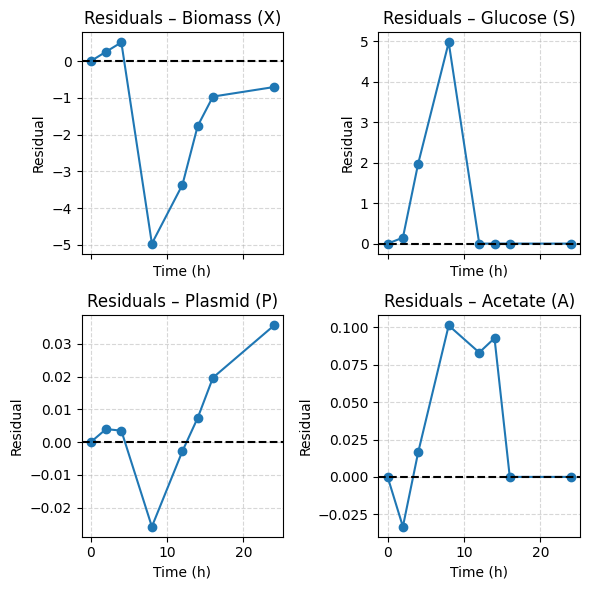

In [38]:
#ANALYSE RESULTS
Y_t = np.array([X_t, S_t, P_t, A_t])
y_sim_tb = odeint(kinetic_model, y0_t, t_t, args=(param_0,))
y_sim_tb_T = y_sim_tb.T

residuals_t = Y_t - y_sim_tb_T
scale_factors_t = np.array([np.mean(var[var != 0]) if np.any(var != 0) else np.nan for var in Y_t])
W_t = np.diag(1 / scale_factors_t**2)
wrss_t = np.trace(residuals_t.T @ W_t @ residuals_t)
print(f"\nWRSS on new dataset: {wrss_t:.4f}")

nrmse_t = []
r2_t = []
for i in range(4):
    res_i = residuals_t[i]
    nrmse_i = np.mean((res_i / scale_factors_t[i])**2)
    r2_i = r2_score(Y_t[i], y_sim_tb_T[i])
    nrmse_t.append(nrmse_i)
    r2_t.append(r2_i)
    print(f"{labels[i]} - Weighted NRMSE: {nrmse_i:.4f} | R²: {r2_i:.4f}")

fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True)
axs = axs.flatten()

for i in range(4):
    axs[i].plot(t_t, residuals_t[i], 'o-', color='tab:blue')
    axs[i].axhline(0, color='black', linestyle='--')
    axs[i].set_title(f'Residuals – {labels[i]}')
    axs[i].set_xlabel('Time (h)')
    axs[i].set_ylabel('Residual')
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [39]:
#COMPARE SIMULATION AND TESTING BATCH DATA VALUES
final_exp = Y_t[:, -1]
final_sim = y_sim_t_T[:, -1]
final_dev = np.where(final_exp != 0,
                     (final_sim - final_exp) / final_exp*100,
                     np.nan)

max_exp = np.max(Y_t, axis=1)
max_sim = np.max(y_sim_t_T, axis=1)
max_dev = (max_sim - max_exp)/max_exp

summary_df = pd.DataFrame({
    "Variable": ["Biomass", "Glucose", "Plasmid", "Acetate"],
    "Exp_f": final_exp,
    "Sim_f": final_sim,
    "Desvio_f": final_dev,
    "Exp_max": max_exp,
    "Sim_max": max_sim,
    "Desvio_max": max_dev
})

summary_styled = summary_df.style.format(precision=4).set_properties(**{
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}])

display(summary_styled)

/tmp/ipython-input-39-3048968104.py:5: RuntimeWarning: divide by zero encountered in divide
  (final_sim - final_exp) / final_exp*100,


,Variable,Exp_f,Sim_f,Desvio_f,Exp_max,Sim_max,Desvio_max
0,Biomass,8.2600,8.9663,8.5514,8.2600,8.9663,0.0855
1,Glucose,0.0000,-0.0000,nan,20.0000,20.0000,0.0000
2,Plasmid,0.0873,0.0517,-40.7964,0.0873,0.0517,-0.4080
3,Acetate,0.0000,-0.0000,nan,0.1013,0.0334,-0.6700


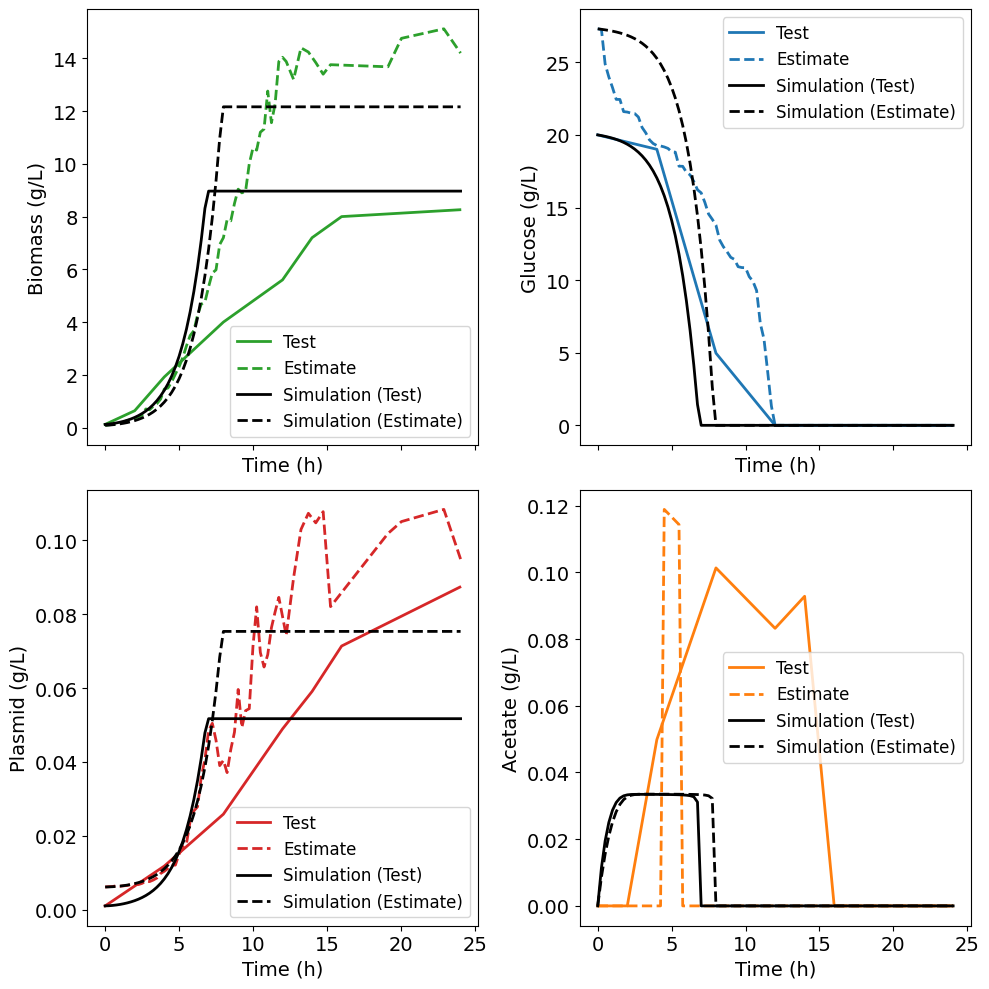

In [40]:
#PLOT ESTIMATION AND TESTING BATCH DATA
y_sim_t_final = odeint(kinetic_model, y0_t, t_d, args=(param_0,))
y_sim_t_final_T = y_sim_t_final.T

y_sim_d_final = odeint(kinetic_model, y0_d, t_d, args=(param_0,))
y_sim_d_final_T = y_sim_d_final.T

var_labels = {
    "X": "Biomass",
    "S": "Glucose",
    "P": "Plasmid",
    "A": "Acetate"
}

colors = {
    "X": "tab:green",
    "S": "tab:blue",
    "P": "tab:red",
    "A": "tab:orange"
}

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
axs = axs.flatten()

for i, (var, idx) in enumerate(output_indices.items()):
    # Plot testing data (solid line or markers)
    axs[i].plot(t_t, Y_t[idx], label="Test", color=colors[var], linewidth=2)

    # Estimation fit (dashed line)
    axs[i].plot(t_d, Y_d[idx], linestyle="--", label="Estimate", color=colors[var], linewidth=2)

    # Simulation using final parameters (dotted line)
    axs[i].plot(t_d, y_sim_t_final_T[idx], label="Simulation (Test)", color='black', linewidth=2)

    # Simulation using final parameters (dotted line)
    axs[i].plot(t_d, y_sim_d_final_T[idx], linestyle="--", label="Simulation (Estimate)", color='black', linewidth=2)

    #axs[i].set_title(var_labels[var])
    axs[i].set_xlabel("Time (h)", fontsize =14 )
    axs[i].set_ylabel(f"{var_labels[var]} (g/L)", fontsize =14 )
    axs[i].legend(fontsize =12)
    axs[i].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

# **Testing Shake Flask**

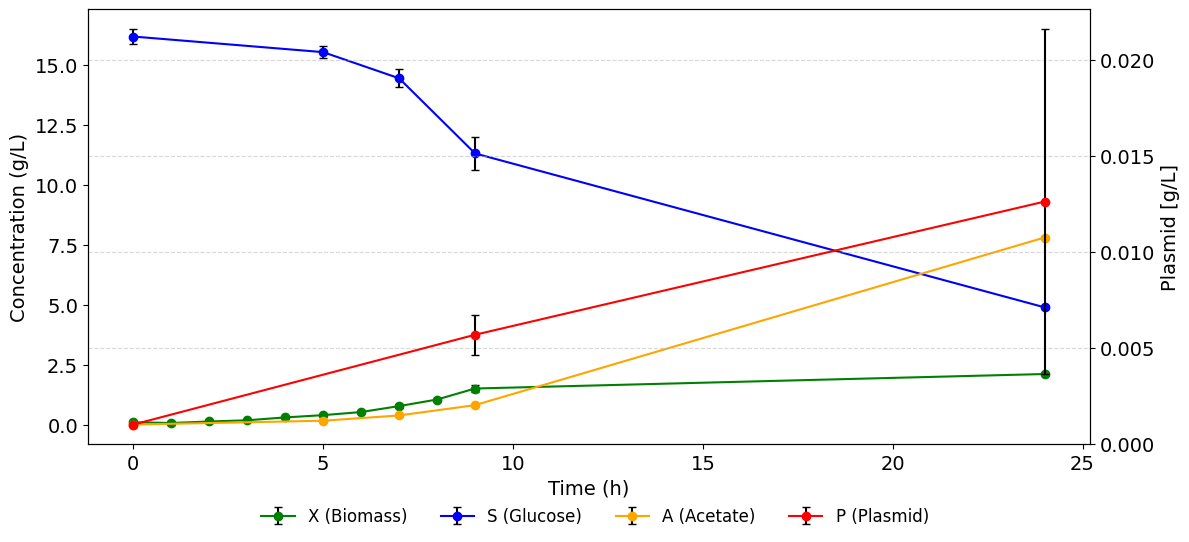

In [41]:
#PLOT EXPERIMENTAL DATA AND SD
fig, ax1 = plt.subplots(figsize=(12, 6))

for label, values, errors, color in [
    ('X (Biomass)', X_I, X_SD, 'green'),
    ('S (Glucose)', S_I, S_SD, 'blue'),
    ('A (Acetate)', A_I, A_SD, 'orange')
]:
    valid = ~np.isnan(values)
    ax1.errorbar(t_I[valid], values[valid], yerr=errors[valid],
                 fmt='-o', label=label, capsize=3, color=color, ecolor='black')

ax1.set_xlabel('Time (h)', fontsize=14)
ax1.set_ylabel('Concentration (g/L)', fontsize=14)
ax1.tick_params(axis='both', labelsize=14)

ax2 = ax1.twinx()
valid_P = ~np.isnan(P_I)
ax2.errorbar(t_I[valid_P], P_I[valid_P], yerr=P_SD[valid_P],
             fmt='-o', label='P (Plasmid)', capsize=3, color='red', ecolor='black')
ax2.set_ylabel('Plasmid [g/L]', fontsize=14)
ax2.tick_params(axis='both', labelsize=14)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2,
           loc='lower center', bbox_to_anchor=(0.5, 0.09), ncol=4, fontsize=12, frameon=False)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()


In [42]:
#SIMULATE MODEL WITH PARAMETERS
Y_t2 = np.array([X_t2, S_t2, P_t2, A_t2])
y0_t2 = [X_t2[0], S_t2[0], P_t2[0], A_t2[0]]
y_sim_t2 = odeint(kinetic_model, y0_t2, t_d, args=(param_0,))
y_sim_t2_T = y_sim_t2.T
print(Y_t2)

[[9.400e-02 1.502e+00 2.106e+00]
 [1.617e+01 1.130e+01 4.885e+00]
 [1.000e-03 5.680e-03 1.262e-02]
 [0.000e+00 8.100e-01 7.795e+00]]


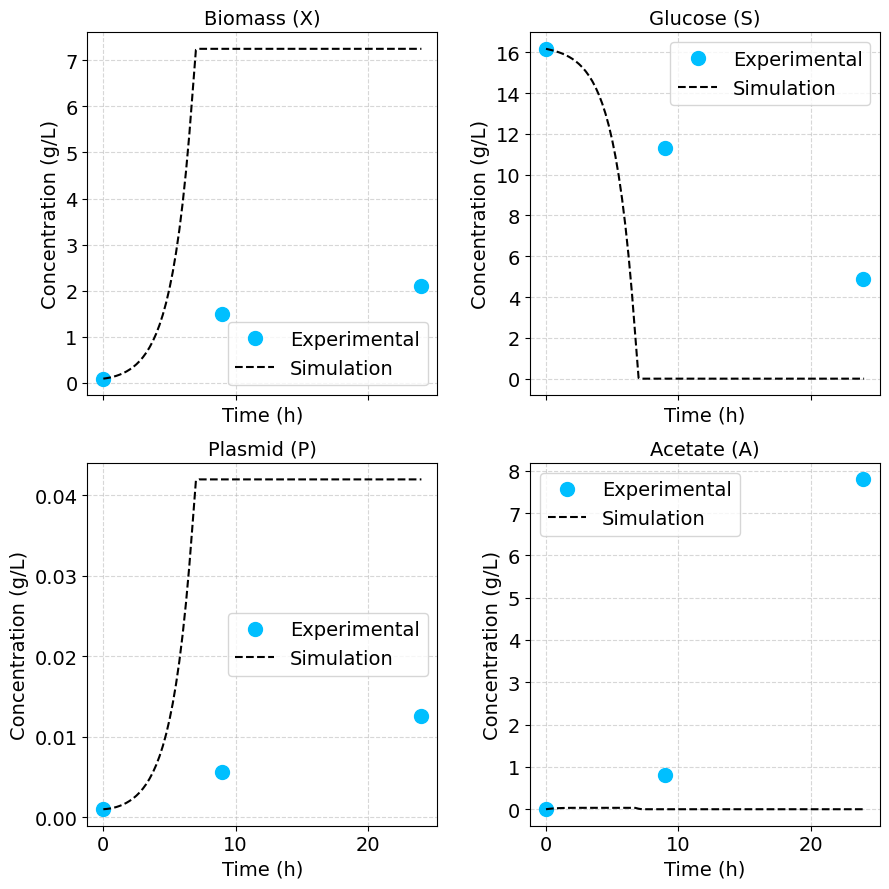

In [43]:
#PLOT SIMULATIO VS TESTING BATCH DATA
labels = ['Biomass (X)', 'Glucose (S)', 'Plasmid (P)', 'Acetate (A)']
fig, axs = plt.subplots(2, 2, figsize=(9, 9), sharex=True)
axs = axs.flatten()

for i in range(4):
    axs[i].plot(t_t2, Y_t2[i], 'o', label='Experimental', color='deepskyblue', markersize=10)
    axs[i].plot(t_d, y_sim_t2_T[i], '--', label='Simulation', color='black')
    axs[i].set_title(labels[i], fontsize = 14)
    axs[i].set_xlabel('Time (h)',fontsize = 14)
    axs[i].set_ylabel('Concentration (g/L)',fontsize = 14)
    axs[i].legend(fontsize = 14)
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()


WRSS on new dataset: 96.3317
Biomass (X) - Weighted NRMSE: 13.0069 | R²: -26.8726
Glucose (S) - Weighted NRMSE: 0.4343 | R²: -1.3653
Plasmid (P) - Weighted NRMSE: 17.5634 | R²: -30.8991
Acetate (A) - Weighted NRMSE: 1.1059 | R²: -0.6719


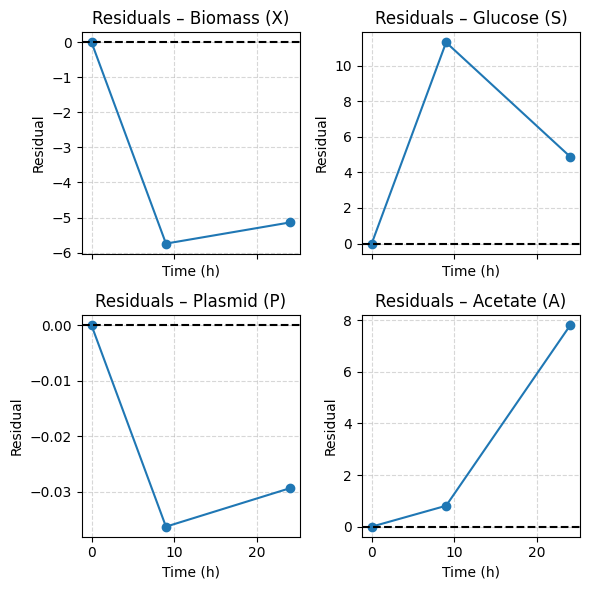

In [44]:
#ANALYSE RESULTS
Y_t2 = np.array([X_t2, S_t2, P_t2, A_t2])
y0_t2 = [X_t2[0], S_t2[0], P_t2[0], A_t2[0]]
y_sim_t2b = odeint(kinetic_model, y0_t2, t_t2, args=(param_0,))
y_sim_t2b_T = y_sim_t2b.T

residuals_t2 = Y_t2 - y_sim_t2b_T
scale_factors_t2 = np.array([np.mean(var[var != 0]) if np.any(var != 0) else np.nan for var in Y_t2])
W_t2 = np.diag(1 / scale_factors_t2**2)
wrss_t2 = np.trace(residuals_t2.T @ W_t2 @ residuals_t2)
print(f"\nWRSS on new dataset: {wrss_t2:.4f}")

nrmse_t2 = []
r2_t2 = []
for i in range(4):
    res_i = residuals_t2[i]
    nrmse_i = np.mean((res_i / scale_factors_t2[i])**2)
    r2_i = r2_score(Y_t2[i], y_sim_t2b_T[i])
    nrmse_t2.append(nrmse_i)
    r2_t2.append(r2_i)
    print(f"{labels[i]} - Weighted NRMSE: {nrmse_i:.4f} | R²: {r2_i:.4f}")

fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True)
axs = axs.flatten()

for i in range(4):
    axs[i].plot(t_t2, residuals_t2[i], 'o-', color='tab:blue')
    axs[i].axhline(0, color='black', linestyle='--')
    axs[i].set_title(f'Residuals – {labels[i]}')
    axs[i].set_xlabel('Time (h)')
    axs[i].set_ylabel('Residual')
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [45]:
#COMPARE SIMULATION AND TESTING SHAKE FLASK DATA VALUES
final_exp = Y_t2[:, -1]
final_sim = y_sim_t2_T[:, -1]
final_dev = np.where(final_exp != 0,
                     (final_sim - final_exp) / final_exp*100,
                     np.nan)

max_exp = np.max(Y_t2, axis=1)
max_sim = np.max(y_sim_t2_T, axis=1)
max_dev = (max_sim - max_exp)/max_exp

summary_df = pd.DataFrame({
    "Variable": ["Biomass", "Glucose", "Plasmid", "Acetate"],
    "Exp_f": final_exp,
    "Sim_f": final_sim,
    "Desvio_f": final_dev,
    "Exp_max": max_exp,
    "Sim_max": max_sim,
    "Desvio_max": max_dev
})

summary_styled = summary_df.style.format(precision=4).set_properties(**{
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}])

display(summary_styled)

,Variable,Exp_f,Sim_f,Desvio_f,Exp_max,Sim_max,Desvio_max
0,Biomass,2.1060,7.2463,244.0774,2.1060,7.2463,2.4408
1,Glucose,4.8850,-0.0000,-100.0000,16.1700,16.1700,0.0000
2,Plasmid,0.0126,0.0420,232.7089,0.0126,0.0420,2.3271
3,Acetate,7.7950,-0.0000,-100.0000,7.7950,0.0334,-0.9957


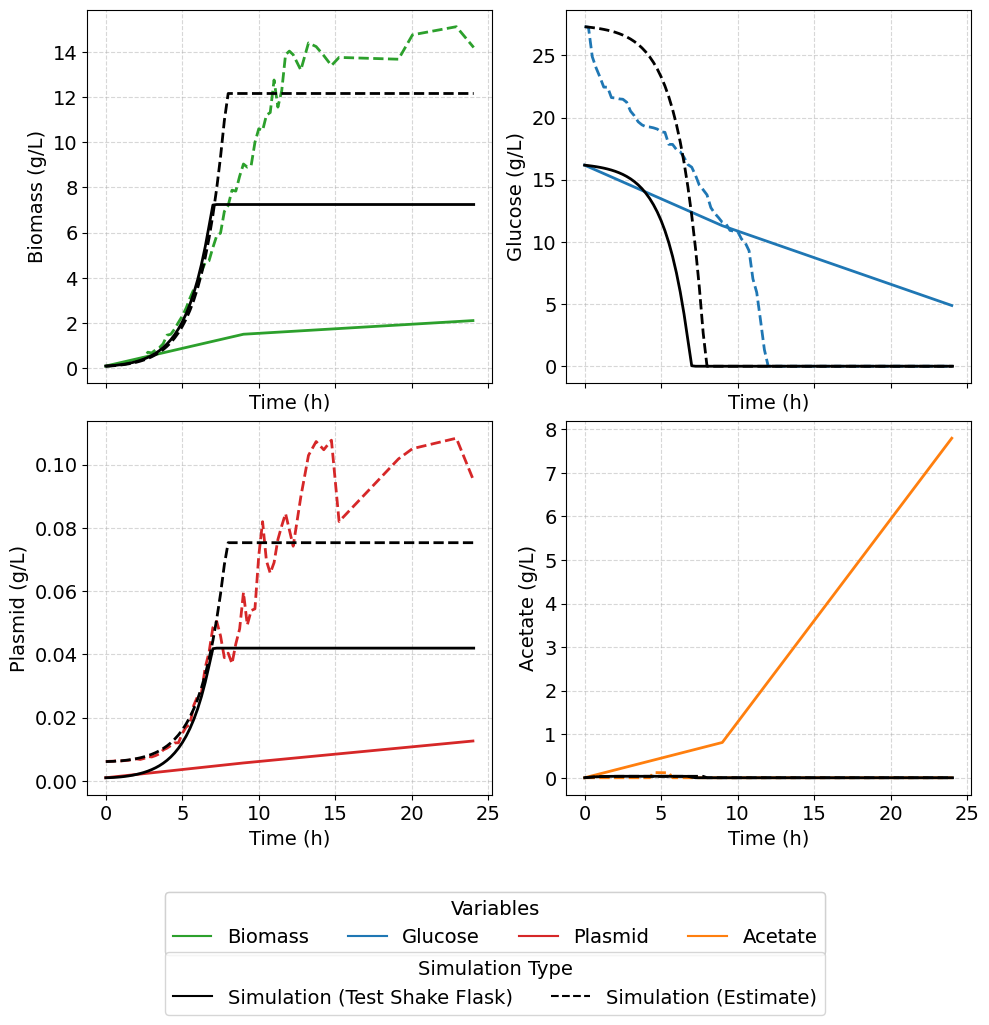

In [46]:
import matplotlib.lines as mlines

y_sim_t2_final = odeint(kinetic_model, y0_t2, t_d, args=(param_0,))
y_sim_t2_final_T = y_sim_t2_final.T

y_sim_d_final = odeint(kinetic_model, y0_d, t_d, args=(param_0,))
y_sim_d_final_T = y_sim_d_final.T

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
axs = axs.flatten()

for i, (var, idx) in enumerate(output_indices.items()):
    ax = axs[i]

    # TESTING SHAKE FLASK DATA
    ax.plot(t_t2, Y_t2[idx], label=None, color=colors[var], linewidth=2)
    # ESTIMATION
    ax.plot(t_d, Y_d[idx], linestyle="--", label=None, color=colors[var], linewidth=2)
    # SIMULATION SHAKE FLASK
    ax.plot(t_d, y_sim_t2_final_T[idx], color='black', linewidth=2, linestyle='-')
    # SIMULATION ESTIMATION
    ax.plot(t_d, y_sim_d_final_T[idx], linestyle="--", color='black', linewidth=2)

    #ax.set_title(var_labels[var], fontsize=14)
    ax.set_xlabel("Time (h)", fontsize=14)
    ax.set_ylabel(f"{var_labels[var]} (g/L)", fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)

var_lines = [
    mlines.Line2D([], [], color=colors['X'], label='Biomass'),
    mlines.Line2D([], [], color=colors['S'], label='Glucose'),
    mlines.Line2D([], [], color=colors['P'], label='Plasmid'),
    mlines.Line2D([], [], color=colors['A'], label='Acetate')
]

style_lines = [
    mlines.Line2D([], [], color='black', linestyle='-', label='Simulation (Test Shake Flask)'),
    mlines.Line2D([], [], color='black', linestyle='--', label='Simulation (Estimate)')
]

legend1 = fig.legend(var_lines, [l.get_label() for l in var_lines],
                     loc='lower center', bbox_to_anchor=(0.5, 0.03), ncol=4, fontsize=14, title="Variables", title_fontsize=14)

legend2 = fig.legend(style_lines, [l.get_label() for l in style_lines],
                     loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol=4, fontsize=14, title="Simulation Type", title_fontsize=14)

fig.add_artist(legend1)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()


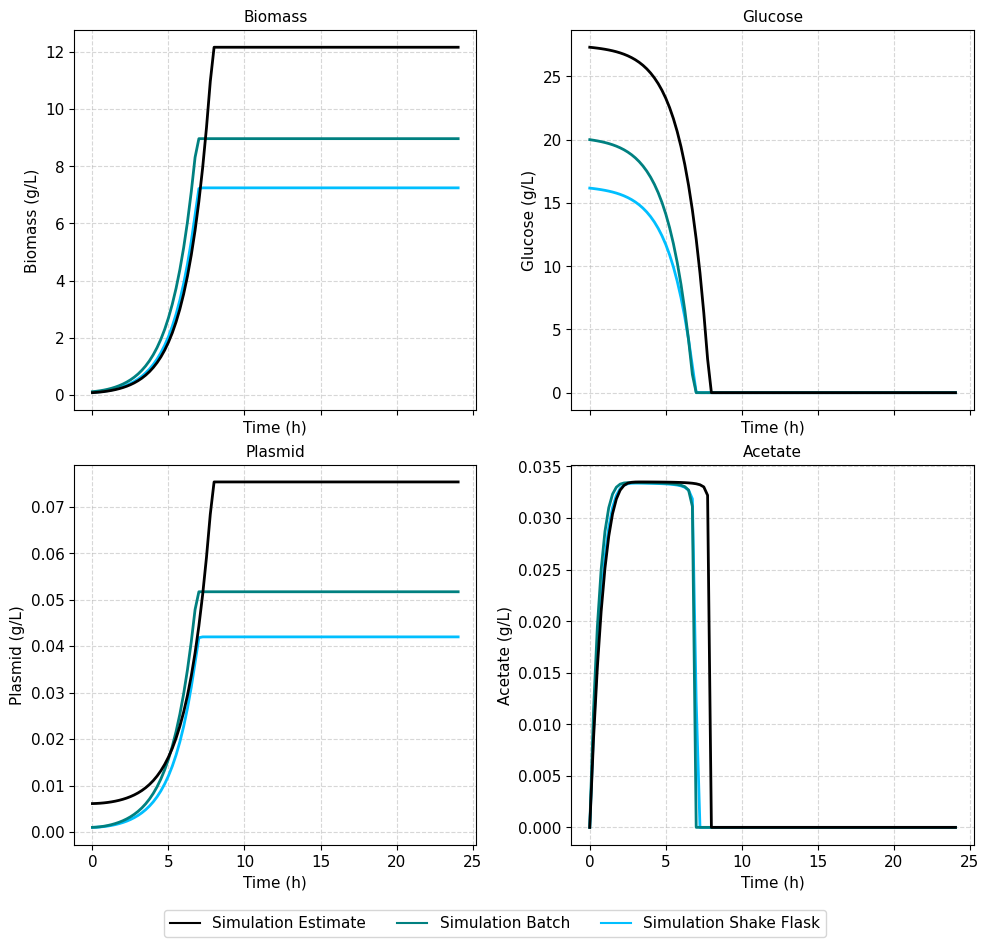

In [47]:
import matplotlib.lines as mlines
y_sim_t2_final = odeint(kinetic_model, y0_t2, t_d, args=(param_0,))
y_sim_t2_final_T = y_sim_t2_final.T

y_sim_t_final = odeint(kinetic_model, y0_t, t_d, args=(param_0,))
y_sim_t_final_T = y_sim_t_final.T

y_sim_d_final = odeint(kinetic_model, y0_d, t_d, args=(param_0,))
y_sim_d_final_T = y_sim_d_final.T

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
axs = axs.flatten()

for i, (var, idx) in enumerate(output_indices.items()):
    ax = axs[i]

    # TESTING SHAKE FLASK DATA
    #ax.plot(t_t2, Y_t2[idx], label=None, color=colors[var], linewidth=2)
    # TESTING BATCH DATA
    #ax.plot(t_t, Y_t[idx], linestyle=":", label=None, color=colors[var], linewidth=2)
    # ESTIMATION
    #ax.plot(t_d, Y_d[idx], linestyle="--", label=None, color=colors[var], linewidth=2)

    # SIMULATION SHAKE FLASK
    ax.plot(t_d, y_sim_t2_final_T[idx], color='deepskyblue', linewidth=2, linestyle='-')
    # SIMULATION BATCH
    ax.plot(t_d, y_sim_t_final_T[idx], linestyle="-", color='teal', linewidth=2)
    # SIMULATION ESTIMATION
    ax.plot(t_d, y_sim_d_final_T[idx], linestyle="-", color='black', linewidth=2)

    ax.set_title(var_labels[var], fontsize=11)
    ax.set_xlabel("Time (h)", fontsize=11)
    ax.set_ylabel(f"{var_labels[var]} (g/L)", fontsize=11)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)

var_lines = [
    mlines.Line2D([], [], color=colors['X'], label='Biomass'),
    mlines.Line2D([], [], color=colors['S'], label='Glucose'),
    mlines.Line2D([], [], color=colors['P'], label='Plasmid'),
    mlines.Line2D([], [], color=colors['A'], label='Acetate')
]

style_lines = [
    mlines.Line2D([], [], color='black', linestyle='-', label='Simulation Estimate'),
    mlines.Line2D([], [], color='teal', linestyle='-', label='Simulation Batch'),
    mlines.Line2D([], [], color='deepskyblue', linestyle='-', label='Simulation Shake Flask')
]

#legend1 = fig.legend(var_lines, [l.get_label() for l in var_lines],
 #                    loc='lower center', bbox_to_anchor=(0.5, 0.15), ncol=4, fontsize=10, title="Variables")

legend2 = fig.legend(style_lines, [l.get_label() for l in style_lines],
                     loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=4, fontsize=11)

#fig.add_artist(legend1)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

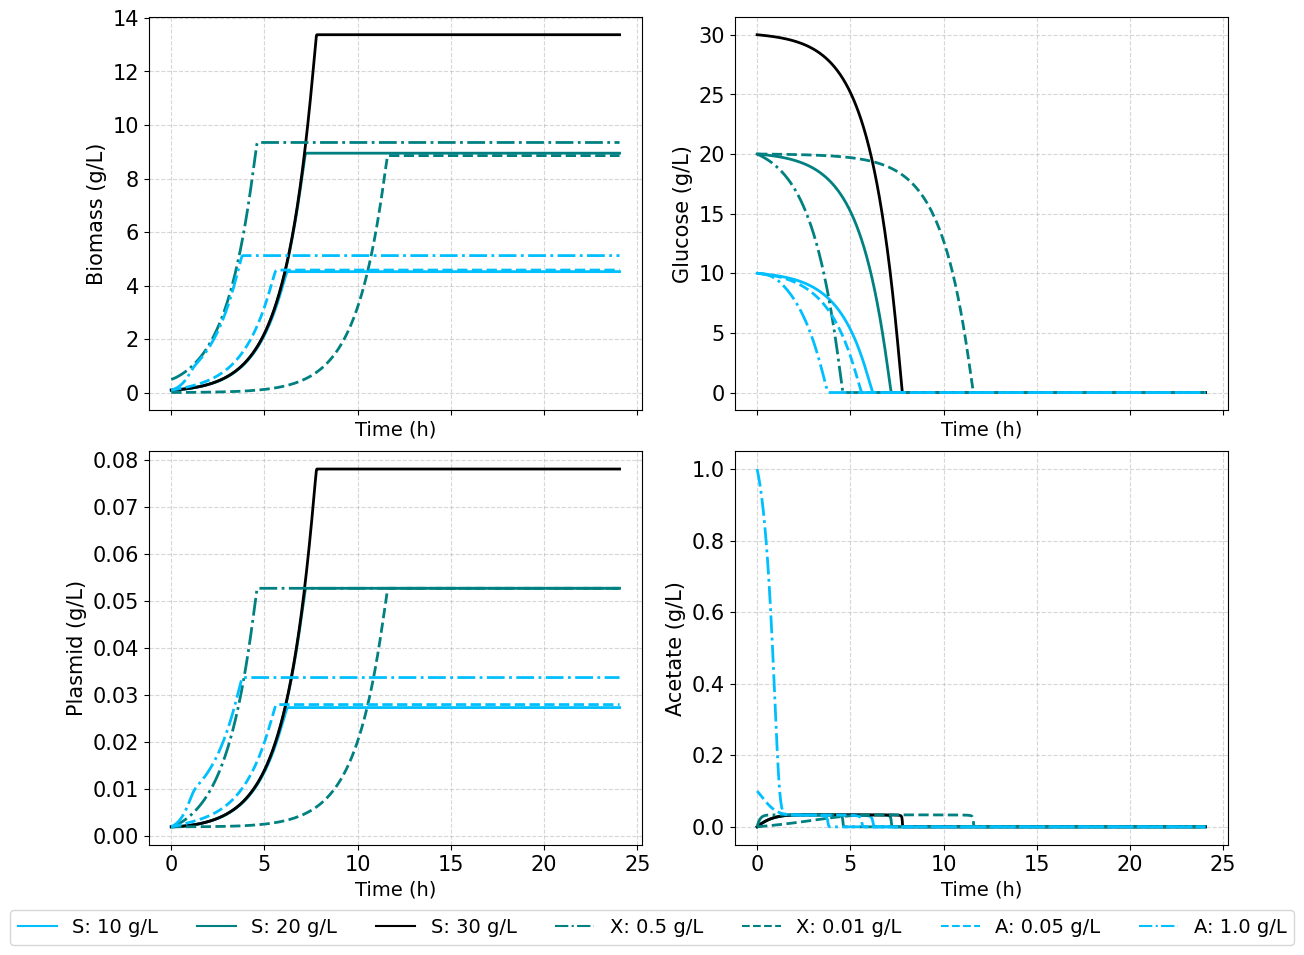

In [48]:
import matplotlib.lines as mlines
dt = 0.02
t0 = 0
T = t_d[-1] #h
t = np.linspace(t0, T, int(T/dt)+1)


#DIFFERENT CONCENTRATION OF GLUCOSE
y0_10 = [1.0E-01, 1.0E+01, 2.0E-03, 0]
y_sim_10 = odeint(kinetic_model, y0_10, t, args=(param_0,))
y_sim_10_T = y_sim_10.T

y0_20 = [1.0E-01, 2.0E+01, 2.0E-03, 0]
y_sim_20 = odeint(kinetic_model, y0_20, t, args=(param_0,))
y_sim_20_T = y_sim_20.T

y0_30 = [1.0E-01, 3.0E+01, 2.0E-03, 0]
y_sim_30 = odeint(kinetic_model, y0_30, t, args=(param_0,))
y_sim_30_T = y_sim_30.T

#DIFFERENT CONCENTRATION OF BIOMASS
y0_205 = [5.0E-01, 2.0E+01, 2.0E-03, 0]
y_sim_205 = odeint(kinetic_model, y0_205, t, args=(param_0,))
y_sim_205_T = y_sim_205.T

y0_201 = [1.0E-02, 2.0E+01, 2.0E-03, 0]
y_sim_201 = odeint(kinetic_model, y0_201, t, args=(param_0,))
y_sim_201_T = y_sim_201.T

#DIFFERENT CONCENTRATION OF PLASMID
y0_305 = [1.0E-01, 3.0E+01, 0.5E-03, 0]
y_sim_305 = odeint(kinetic_model, y0_305, t, args=(param_0,))
y_sim_305_T = y_sim_305.T

y0_308 = [1.0E-01, 3.0E+01, 8.0E-03, 0]
y_sim_308 = odeint(kinetic_model, y0_308, t, args=(param_0,))
y_sim_308_T = y_sim_308.T

#DIFFERENT CONCENTRATION OF ACETATE
y0_105 = [1.0E-01, 1.0E+01, 2.0E-03, 1.0E-01]
y_sim_105 = odeint(kinetic_model, y0_105, t, args=(param_0,))
y_sim_105_T = y_sim_105.T

y0_101 = [1.0E-01, 1.0E+01, 2.0E-03, 1.0]
y_sim_101 = odeint(kinetic_model, y0_101, t, args=(param_0,))
y_sim_101_T = y_sim_101.T


fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True)
axs = axs.flatten()

for i, (var, idx) in enumerate(output_indices.items()):
    ax = axs[i]

    # SIMULATION SHAKE FLASK
    ax.plot(t, y_sim_10_T[idx], color='deepskyblue', linewidth=2, linestyle='-')         # 10 g/L GLUCOSE
    # SIMULATION BATCH
    ax.plot(t, y_sim_20_T[idx], color='teal', linewidth=2, linestyle='-')     # 20 g/L GLUCOSE
    # SIMULATION ESTIMATION
    ax.plot(t, y_sim_30_T[idx], color='black', linewidth=2, linestyle='-')            # 30 g/L GLUCOSE

    ax.plot(t, y_sim_205_T[idx], color='teal', linewidth=2, linestyle='dashdot')  #0.5 g/L BIOMASS

    ax.plot(t, y_sim_201_T[idx], color='teal', linewidth=2, linestyle='--')       #0.01 g/L BIOMASS

    #ax.plot(t, y_sim_305_T[idx], color='black', linewidth=2, linestyle='--')

    #ax.plot(t, y_sim_308_T[idx], color='black', linewidth=2, linestyle='dashdot')

    ax.plot(t, y_sim_105_T[idx], color='deepskyblue', linewidth=2, linestyle='--')           #0.05 g/L ACETATE

    ax.plot(t, y_sim_101_T[idx], color='deepskyblue', linewidth=2, linestyle='dashdot')      #1.00 g/L ACETATE

    #ax.set_title(var_labels[var], fontsize=13)
    ax.set_xlabel("Time (h)", fontsize=14)
    ax.set_ylabel(f"{var_labels[var]} (g/L)", fontsize=15)
    ax.tick_params(axis='both', labelsize=15)
    ax.grid(True, linestyle='--', alpha=0.5)


style_lines = [
    mlines.Line2D([], [], color='deepskyblue', linestyle='-', label='S: 10 g/L'),
    mlines.Line2D([], [], color='teal', linestyle='-', label='S: 20 g/L'),
    mlines.Line2D([], [], color='black', linestyle='-', label='S: 30 g/L'),
    mlines.Line2D([], [], color='teal', linestyle='dashdot', label='X: 0.5 g/L'),
    mlines.Line2D([], [], color='teal', linestyle='--', label='X: 0.01 g/L'),
    #mlines.Line2D([], [], color='black', linestyle='--', label='P: 0.5 mg/L'),
    #mlines.Line2D([], [], color='black', linestyle=':', label='P: 8.0 mg/L'),
    mlines.Line2D([], [], color='deepskyblue', linestyle='--', label='A: 0.05 g/L'),
    mlines.Line2D([], [], color='deepskyblue', linestyle='dashdot', label='A: 1.0 g/L')
]

#legend1 = fig.legend(var_lines, [l.get_label() for l in var_lines],
                     #loc='lower center', bbox_to_anchor=(0.5, 0.03), ncol=4, fontsize=10, title="Variables")

legend2 = fig.legend(style_lines, [l.get_label() for l in style_lines],
                     loc='lower center', bbox_to_anchor=(0.5, 0.04), ncol=7, fontsize=14)
#fig.add_artist(legend1)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()